In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os, gc
os.listdir()

['catboost_info',
 '.ipynb_checkpoints',
 'test_bqCt9Pv.csv',
 'train_aox2Jxw',
 'LTS-loan-pred.zip',
 'submission',
 'data-cleaning-baseline.ipynb',
 'data-cleaning-baseline-Copy1.ipynb',
 'train_aox2Jxw.zip',
 'sample_submission_24jSKY6.csv']

In [2]:
train_df = pd.read_csv('train_aox2Jxw/train.csv')
test_df  = pd.read_csv('test_bqCt9Pv.csv')
sub      = pd.read_csv('sample_submission_24jSKY6.csv')
info_df  = pd.read_excel('train_aox2Jxw/Data Dictionary.xlsx')

In [3]:
train_df.shape, test_df.shape, sub_df.shape, info_df.shape

((233154, 41), (112392, 40), (112392, 2), (41, 3))

In [4]:
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [13]:
# train ==> dtypes: float64(1), int64(34), object(6)
# test  ==> dtypes: float64(1), int64(33), object(6)

In [5]:
tr_id = train_df.UniqueID.unique()
ts_id = test_df.UniqueID.unique()

print("unique's ids: ",tr_id.shape, ts_id.shape)
min(tr_id), max(tr_id), min(ts_id), max(ts_id), len(set(tr_id).intersection(set(ts_id)))

unique's ids:  (233154,) (112392,)


(417428, 671084, 654115, 769909, 0)

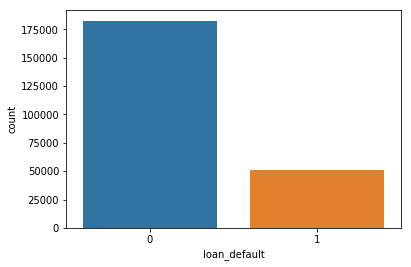

In [6]:
sns.countplot(train_df.loan_default)

In [7]:
info_df

,Variable Name,Description,Unnamed: 2
0,UniqueID,Identifier for customers,NaN
1,loan_default,Payment default in the first EMI on due date,NaN
2,disbursed_amount,Amount of Loan disbursed,NaN
3,asset_cost,Cost of the Asset,NaN
4,ltv,Loan to Value of the asset,NaN
5,branch_id,Branch where the loan was disbursed,NaN
6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,Current_pincode,Current pincode of the customer,NaN
9,Date.of.Birth,Date of birth of the customer,NaN


In [36]:
train_df.loan_default.value_counts()


0    182543
1     50611
Name: loan_default, dtype: int64

In [37]:
scale_pos_weight = 182543/50611

In [59]:
train_df.select_dtypes('object').apply(lambda x: pd.Series.value_counts(x).shape)

Date.of.Birth                    (15433,)
Employment.Type                      (2,)
DisbursalDate                       (84,)
PERFORM_CNS.SCORE.DESCRIPTION       (20,)
AVERAGE.ACCT.AGE                   (192,)
CREDIT.HISTORY.LENGTH              (294,)
dtype: object

In [60]:
train_df.select_dtypes('object')

,Date.of.Birth,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,01-01-84,Salaried,03-08-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
1,31-07-85,Self employed,26-09-18,I-Medium Risk,1yrs 11mon,1yrs 11mon
2,24-08-85,Self employed,01-08-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
3,30-12-93,Self employed,26-10-18,L-Very High Risk,0yrs 8mon,1yrs 3mon
4,09-12-77,Self employed,26-09-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
5,08-09-90,Self employed,19-09-18,A-Very Low Risk,1yrs 9mon,2yrs 0mon
6,01-06-88,Salaried,23-09-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
7,04-10-89,Salaried,16-09-18,Not Scored: Not Enough Info available on the c...,0yrs 2mon,0yrs 2mon
8,15-11-91,Self employed,05-09-18,D-Very Low Risk,4yrs 8mon,4yrs 8mon
9,01-06-68,Salaried,16-09-18,A-Very Low Risk,1yrs 7mon,1yrs 7mon


In [8]:
train_df.apply(lambda x: pd.Series.value_counts(x).shape[0])

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

In [9]:
train_df['date_of_birth'] = pd.to_datetime(train_df['Date.of.Birth'])
test_df['date_of_birth']  = pd.to_datetime(test_df['Date.of.Birth'])

train_df['day_of_birth'] = train_df['date_of_birth'].dt.day
train_df['month_of_birth'] = train_df['date_of_birth'].dt.month
train_df['year_of_birth'] = train_df['date_of_birth'].dt.year

test_df['day_of_birth'] = test_df['date_of_birth'].dt.day
test_df['month_of_birth'] = test_df['date_of_birth'].dt.month
test_df['year_of_birth'] = test_df['date_of_birth'].dt.year

train_df.drop(['date_of_birth','Date.of.Birth'], axis=1, inplace=True)
test_df.drop(['date_of_birth','Date.of.Birth'], axis=1, inplace=True)


In [10]:
train_df['credit_hist_year'] = train_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0][:-3])
train_df['credit_hist_month'] = train_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[1][:-3])

train_df['loan_tenure_year'] = train_df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0][:-3])
train_df['loan_tenure_month'] = train_df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[1][:-3])

test_df['credit_hist_year'] = test_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0][:-3])
test_df['credit_hist_month'] = test_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[1][:-3])

test_df['loan_tenure_year'] = test_df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0][:-3])
test_df['loan_tenure_month'] = test_df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[1][:-3])

train_df.drop(['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'], axis=1, inplace=True)
test_df.drop(['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'], axis=1, inplace=True)


In [11]:
train_df['disbursal_date'] = pd.to_datetime(train_df['DisbursalDate'])
test_df['disbursal_date']  = pd.to_datetime(test_df['DisbursalDate'])

train_df['day_of_disbursal']   = train_df['disbursal_date'].dt.day
train_df['month_of_disbursal'] = train_df['disbursal_date'].dt.month
train_df['year_of_disbursal']  = train_df['disbursal_date'].dt.year

test_df['day_of_disbursal']   = test_df['disbursal_date'].dt.day
test_df['month_of_disbursal'] = test_df['disbursal_date'].dt.month
test_df['year_of_disbursal']  = test_df['disbursal_date'].dt.year

train_df.drop(['disbursal_date','DisbursalDate'], axis=1, inplace=True)
test_df.drop(['disbursal_date','DisbursalDate'], axis=1, inplace=True)


## Very suspicious various `train_df['PERFORM_CNS.SCORE.DESCRIPTION']`

In [12]:
train_df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

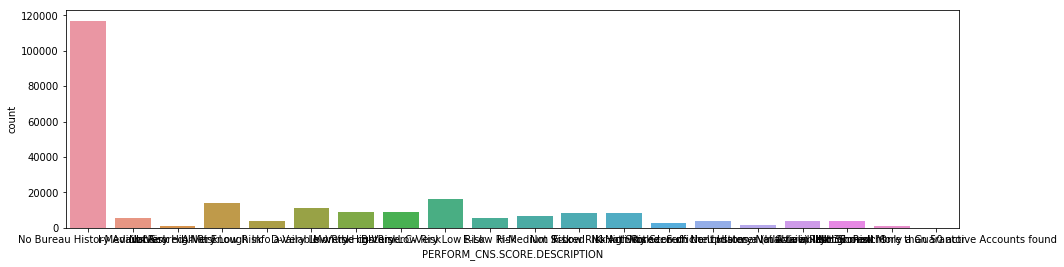

In [13]:
plt.figure(figsize=(16,4))
sns.countplot(train_df['PERFORM_CNS.SCORE.DESCRIPTION'])

In [125]:
train_df.groupby(['PERFORM_CNS.SCORE.DESCRIPTION','PERFORM_CNS.SCORE'])['PERFORM_CNS.SCORE'].mean()

PERFORM_CNS.SCORE.DESCRIPTION                            PERFORM_CNS.SCORE
A-Very Low Risk                                          806                  806
                                                         807                  807
                                                         808                  808
                                                         809                  809
                                                         810                  810
                                                         811                  811
                                                         812                  812
                                                         813                  813
                                                         814                  814
                                                         815                  815
                                                         816                  816
                       

In [14]:
# bureau description and corresponding score
mapping = {
        'No Bureau History Available'                            :'not_enough_info',# 00
        'Not Scored: More than 50 active Accounts found'         :'not_enough_info',# 11
        'Not Scored: No Activity seen on the customer (Inactive)':'not_enough_info',# 16
        'Not Scored: No Updates available in last 36 months'     :'not_enough_info',# 18 
        'Not Scored: Not Enough Info available on the customer'  :'not_enough_info',# 17
        'Not Scored: Only a Guarantor'                           :'not_enough_info',# 14
        'Not Scored: Sufficient History Not Available'           :'not_enough_info' # 15
       }

train_df['Bureau_desc'] = train_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(mapping)
test_df['Bureau_desc'] = test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(mapping)

In [16]:
use_index = train_df[['PERFORM_CNS.SCORE.DESCRIPTION','PERFORM_CNS.SCORE']][
    train_df['Bureau_desc'] == 'not_enough_info']['PERFORM_CNS.SCORE'].index
train_df['bureau_score'] = train_df['PERFORM_CNS.SCORE']
train_df.loc[use_index,'bureau_score'] = 0


use_index = test_df[['PERFORM_CNS.SCORE.DESCRIPTION','PERFORM_CNS.SCORE']][
    test_df['Bureau_desc'] == 'not_enough_info']['PERFORM_CNS.SCORE'].index
test_df['bureau_score'] = test_df['PERFORM_CNS.SCORE']
test_df.loc[use_index,'bureau_score'] = 0

train_df.drop(['PERFORM_CNS.SCORE.DESCRIPTION','PERFORM_CNS.SCORE'], axis=1, inplace=True)
test_df.drop(['PERFORM_CNS.SCORE.DESCRIPTION','PERFORM_CNS.SCORE'], axis=1, inplace=True)


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(train_df['Bureau_desc'])+list(test_df['Bureau_desc']))
print(le.classes_)
train_df['Bureau_desc'] = le.transform(train_df['Bureau_desc'])
test_df['Bureau_desc'] = le.transform(test_df['Bureau_desc'])


['A-Very Low Risk' 'B-Very Low Risk' 'C-Very Low Risk' 'D-Very Low Risk'
 'E-Low Risk' 'F-Low Risk' 'G-Low Risk' 'H-Medium Risk' 'I-Medium Risk'
 'J-High Risk' 'K-High Risk' 'L-Very High Risk' 'M-Very High Risk'
 'not_enough_info']


In [19]:
cat_cols = ['State_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'Driving_flag', 
            'VoterID_flag', 'Passport_flag', 'PRI.OVERDUE.ACCTS', 'SEC.NO.OF.ACCTS',
            'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'NO.OF_INQUIRIES',
            'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']

In [20]:
test_df[['credit_hist_year', 'credit_hist_month','loan_tenure_year', 'loan_tenure_month']] = \
test_df[['credit_hist_year', 'credit_hist_month','loan_tenure_year', 'loan_tenure_month']].astype('int')

In [21]:
tr_ids = train_df['UniqueID']
ts_ids = test_df['UniqueID']
target = train_df['loan_default']
print(target.value_counts())
# 182543/50611

train_df_save = train_df.copy()
test_df_save = test_df.copy()
print(train_df.shape, test_df.shape, target.shape)

0    182543
1     50611
Name: loan_default, dtype: int64
(233154, 47) (112392, 46) (233154,)


In [22]:
target[train_df['Employment.Type'].isnull()].value_counts()

0    6017
1    1644
Name: loan_default, dtype: int64

In [23]:
train_df['Employment.Type'].fillna('Self employed', inplace=True)
test_df['Employment.Type'].fillna('Self employed', inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(train_df['Employment.Type'])+list(test_df['Employment.Type']))
print(le.classes_)
train_df['Employment.Type'] = le.transform(train_df['Employment.Type'])
test_df['Employment.Type'] = le.transform(test_df['Employment.Type'])


['Salaried' 'Self employed']


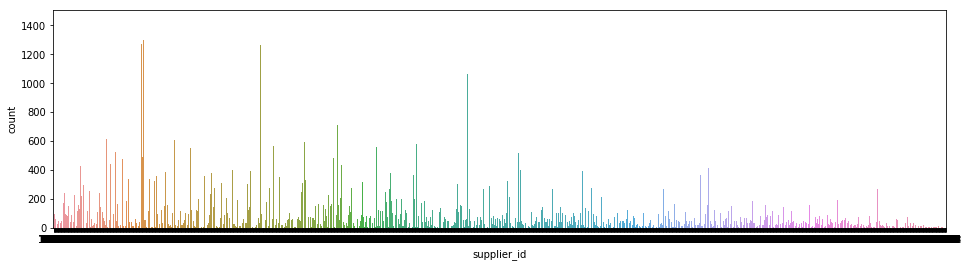

In [24]:
plt.figure(figsize=(16,4))
sns.countplot(train_df['supplier_id'])

In [25]:
train_df.groupby(['supplier_id','loan_default'])['loan_default'].count().unstack().mean()

loan_default
0    62.967575
1    18.983871
dtype: float64

In [26]:
len(set(train_df.supplier_id)),len(set(test_df.supplier_id)), len(set(train_df.supplier_id).intersection(set(test_df.supplier_id))),\
len(set(train_df.State_ID)),len(set(test_df.State_ID)), len(set(train_df.State_ID).intersection(set(test_df.State_ID)))

(2953, 2863, 2727, 22, 22, 22)

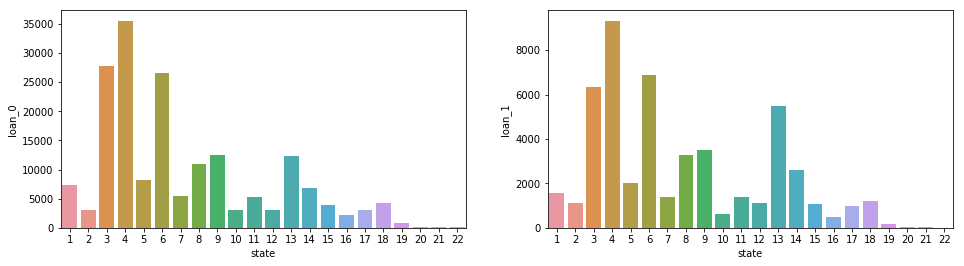

In [27]:
state_gps = train_df.groupby(['State_ID','loan_default'])['loan_default'].count().unstack()
state_gps.columns = ['loan_0', 'loan_1']
state_gps['state'] = state_gps.index

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=state_gps, ax=ax[0])
sns.barplot(x='state',y="loan_1", data=state_gps, ax=ax[1])

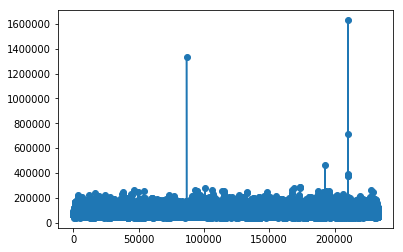

In [28]:
#   	asset_cost  	Cost of the Asset 	NaN
# 4 	ltv         	Loan to Value of the asset 	NaN
# 5 	branch_id   	Branch where the loan was disbursed 	NaN
# 6 	supplier_id 	Vehicle Dealer where the loan was disbursed 	NaN
# 7 	manufacturer_id 	Vehicle manufacturer(Hero, Honda, TVS etc.) 	NaN

plt.plot(train_df['asset_cost'],'-o')

228729 233154
unique values:  (46252,) (46252,) (43802,) (43802,)


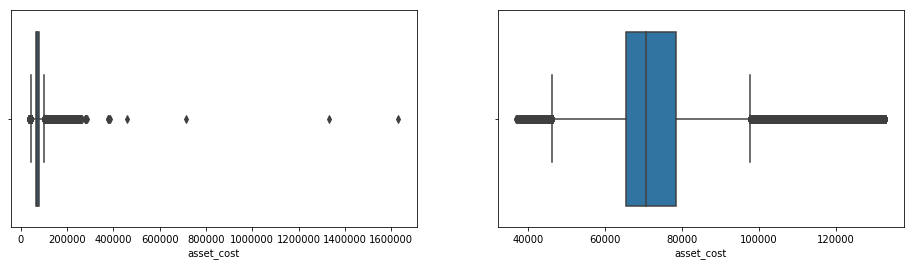

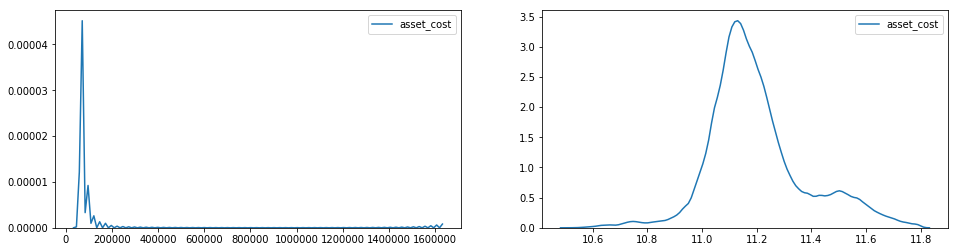

In [31]:
from scipy import stats
col = 'asset_cost'
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(np.log(tp), ax=ax[1])#,label='1')

print("unique values: ", train_df[col].unique().shape, 
      train_df[col].round().unique().shape, 
      tp.unique().shape, tp.round().unique().shape)

233154 ==> 230409


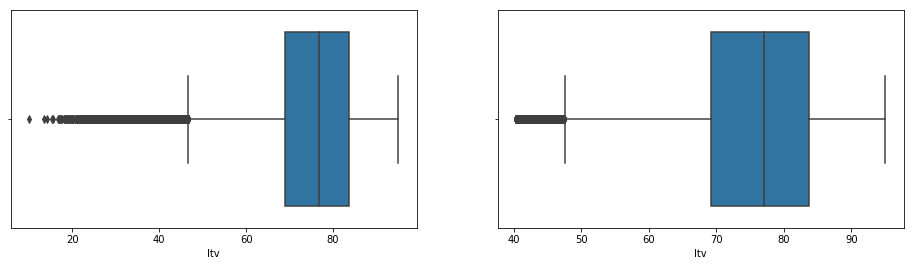

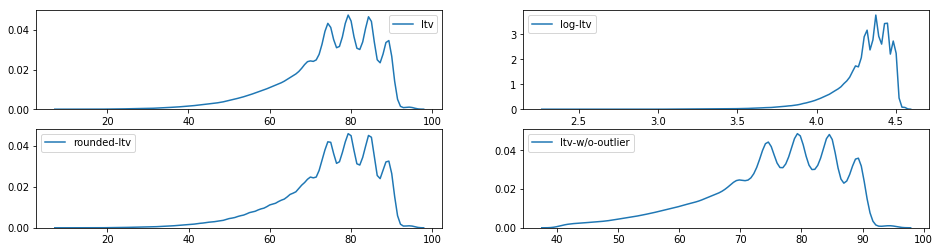

In [37]:
col = 'ltv'
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(train_df.shape[0], "==>", tp.shape[0])

fig, ax = plt.subplots(2,2,figsize=(16,4))
axes = ax.flatten()
sns.kdeplot(train_df[col], ax=axes[0],label='ltv')
sns.kdeplot(np.log(train_df[col]), ax=axes[1],label='log-ltv')

sns.kdeplot(train_df[col].round(), ax=axes[2],label='rounded-ltv')
sns.kdeplot(tp, ax=axes[3],label='ltv-w/o-outlier')
plt.legend()

Let's say the current appraised value of your home is $200,000. The remaining mortgage balance is $160,000. $160,000 is 80% of $200,000 — so that's an 80% loan-to-value ratio. Generally, a lower LTV ratio is better, although we consider many factors when figuring out your refinance options.


In [35]:
col = 'ltv'
train_df[col].unique().shape, train_df[col].round().unique().shape, tp.unique().shape, tp.round().unique().shape

((6579,), (83,), (5282,), (56,))

In [39]:
train_df['ltv_round'] = train_df[col].round()
test_df['ltv_round']  = test_df[col].round()


In [40]:
len(set(train_df.branch_id)),len(set(test_df.branch_id)), \
len(set(train_df.branch_id).intersection(set(test_df.branch_id))),\
len(set(train_df.supplier_id)),len(set(test_df.supplier_id)), \
len(set(train_df.supplier_id).intersection(set(test_df.supplier_id))),\
len(set(train_df.manufacturer_id)),len(set(test_df.manufacturer_id)), \
len(set(train_df.manufacturer_id).intersection(set(test_df.manufacturer_id)))

(82, 82, 82, 2953, 2863, 2727, 11, 11, 10)

Text(0, 0.5, 'loan_1(normalized)')

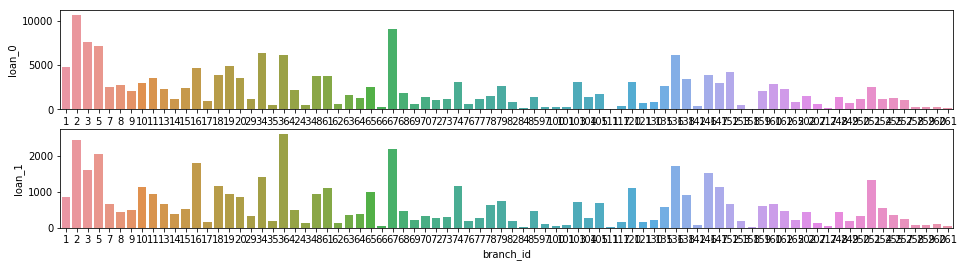

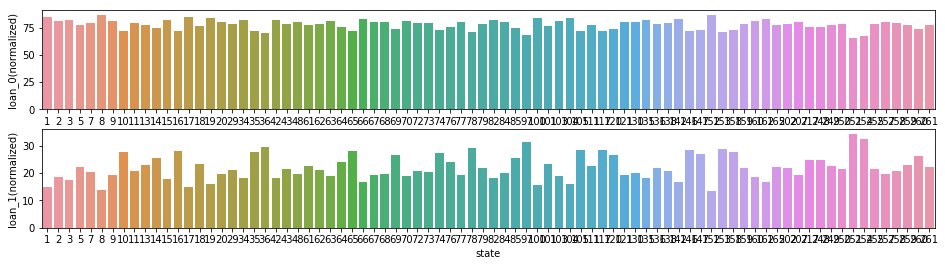

In [42]:
branch_gps = train_df.groupby(['branch_id','loan_default'])['loan_default'].count().unstack()
branch_gps.columns = ['loan_0', 'loan_1']
branch_gps['state'] = branch_gps.index

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=branch_gps, ax=ax[0])#,label='0')
ax[0].set_xlabel('branch_id')
sns.barplot(x='state',y="loan_1", data=branch_gps, ax=ax[1])#,label='1')
ax[1].set_xlabel('branch_id')

branch_gps[['loan_0','loan_1']] = 100*branch_gps[['loan_0','loan_1']].apply(lambda x: x/x.sum(), axis=1)

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=branch_gps, ax=ax[0])#,label='0')
ax[0].set_ylabel('loan_0(normalized)')
sns.barplot(x='state',y="loan_1", data=branch_gps, ax=ax[1])#,label='1')
ax[1].set_ylabel('loan_1(normalized)')



Text(0, 0.5, 'loan_1(norm)')

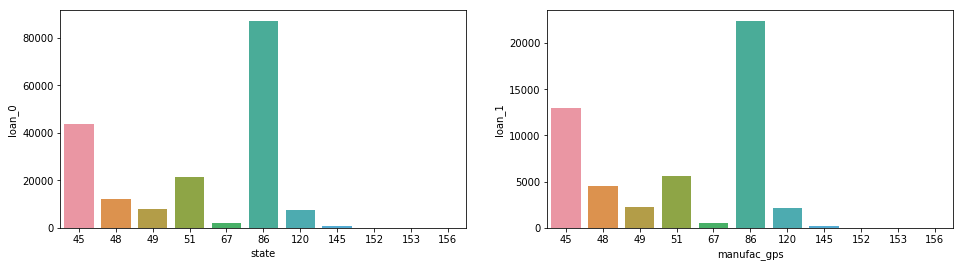

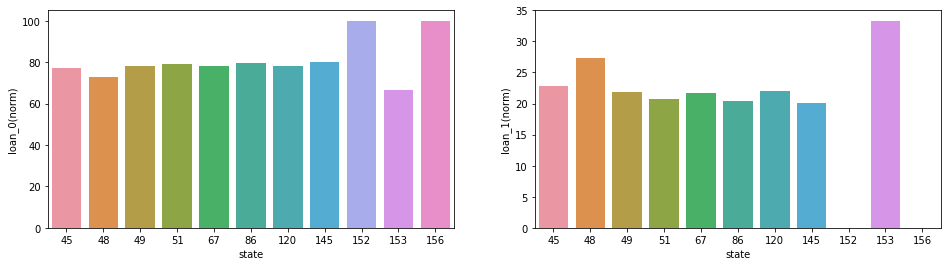

In [43]:
manufac_gps = train_df.groupby(['manufacturer_id','loan_default'])['loan_default'].count().unstack()
manufac_gps.columns = ['loan_0', 'loan_1']
manufac_gps['state'] = manufac_gps.index

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')
ax[1].set_xlabel('manufac_gps')

manufac_gps[['loan_0','loan_1']] = 100*manufac_gps[['loan_0','loan_1']].apply(lambda x: x/x.sum(), axis=1)


fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
ax[0].set_ylabel('loan_0(norm)')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')
ax[1].set_ylabel('loan_1(norm)')


In [ ]:
# Application amount: This is the amount you are applying for. You might want to apply for a loan of 40 lakhs to pursue your higher studies.
# Sanctioned amount: This is the amount that the bank has approved you for after their due diligence. This will be less than or equal to the application amount. In the case mentioned above, it might happen that the bank can only approve you for a loan for 30 lakhs due to any number of reasons.
# Disbursed amount: The amount that has been used from the sanctioned amount. It might happen that you were approved for 30 lakhs. But you received a scholarship, or decided to use your savings to fund your education. You only take 5 lakhs from the bank as the loan. This is the disbursed amount
    

# 22  	PRI.NO.OF.ACCTS 	count of total loans taken by the customer at ... 	Primary 
#     accounts are those which the customer ...
# 23  	PRI.ACTIVE.ACCTS 	count of active loans taken by the customer at... 	NaN
# 24  	PRI.OVERDUE.ACCTS 	count of default accounts at the time of disbu... 	NaN
# 25 	PRI.CURRENT.BALANCE 	total Principal outstanding amount of the acti... 	The outstanding amount is the Total due of your loan that you need to pay to the bank including interest and principal till date. Its nothing but the total loan amount sanctioned minus the pricipal part part of ur EMI.
# 26 	PRI.SANCTIONED.AMOUNT 	total amount that was sanctioned for all the l... 	NaN
# 27 	PRI.DISBURSED.AMOUNT 	total amount that was disbursed for all the lo... 	NaN


In [44]:
cols = [  'PRI.NO.OF.ACCTS','PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS',
          'PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT',
          'PRIMARY.INSTAL.AMT']
train_df[cols].apply(lambda x: pd.Series.value_counts(x).shape[0])

PRI.NO.OF.ACCTS            108
PRI.ACTIVE.ACCTS            40
PRI.OVERDUE.ACCTS           22
PRI.CURRENT.BALANCE      71341
PRI.SANCTIONED.AMOUNT    44390
PRI.DISBURSED.AMOUNT     47909
PRIMARY.INSTAL.AMT       28067
dtype: int64

In [68]:
# sorted(train_df['PRI.NO.OF.ACCTS'].unique())

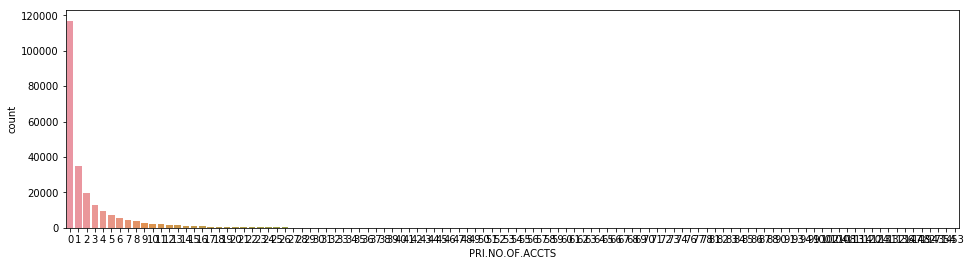

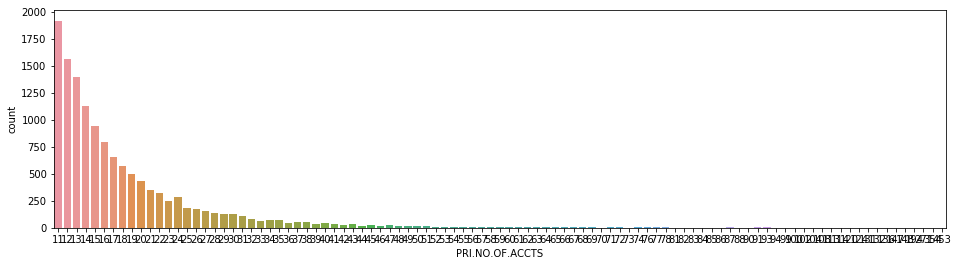

In [64]:
col = 'PRI.NO.OF.ACCTS'
plt.figure(figsize=(16,4))
sns.countplot(train_df[col])

plt.figure(figsize=(16,4))
sns.countplot(train_df[col][train_df[col] > 10])


In [51]:
# no_of_loans = train_df.groupby(['PRI.NO.OF.ACCTS','loan_default'])['loan_default'].count().unstack()
# no_of_loans.columns = ['loan_0','loan_1']
# no_of_loans[no_of_loans.loan_0 < 20]

,loan_0,loan_1
PRI.NO.OF.ACCTS,,
44,17.0,NaN
45,19.0,5.0
46,18.0,2.0
48,10.0,4.0
49,13.0,1.0
50,11.0,5.0
51,13.0,4.0
52,7.0,2.0
53,8.0,3.0


In [65]:
bins = pd.IntervalIndex.from_tuples([(-1, 0), (0, 1), (1, 500)])
train_df['no_of_loans'] = pd.cut(train_df['PRI.NO.OF.ACCTS'], bins)
test_df['no_of_loans'] = pd.cut(test_df['PRI.NO.OF.ACCTS'], bins)
print(train_df.no_of_loans.value_counts())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(train_df['no_of_loans']) + list(test_df['no_of_loans']))
print(le.classes_)
train_df['no_of_loans'] = le.transform(train_df['no_of_loans'])
test_df['no_of_loans']  = le.transform(test_df['no_of_loans'])

train_df.groupby(['no_of_loans','loan_default'])['loan_default'].count().unstack()


(-1, 0]     116950
(1, 500]     81226
(0, 1]       34978
Name: no_of_loans, dtype: int64
[Interval(-1, 0, closed='right') Interval(0, 1, closed='right')
 Interval(1, 500, closed='right')]


loan_default,0,1
no_of_loans,,
0,89898,27052
1,27241,7737
2,65404,15822


In [66]:
train_df.drop('PRI.NO.OF.ACCTS', axis=1, inplace=True)
test_df.drop('PRI.NO.OF.ACCTS', axis=1, inplace=True)


In [67]:
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,credit_hist_month,loan_tenure_year,loan_tenure_month,day_of_disbursal,month_of_disbursal,year_of_disbursal,Bureau_desc,bureau_score,ltv_round,no_of_loans
0,420825,50578,58400,89.55,67,22807,45,1441,0,6,...,0,0,0,8,3,2018,13,0,90.0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1,6,...,11,1,11,26,9,2018,8,598,73.0,1
2,417566,53278,61360,89.63,67,22807,45,1497,1,6,...,0,0,0,8,1,2018,13,0,90.0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1,6,...,3,0,8,26,10,2018,11,305,88.0,2
4,539055,52378,60300,88.39,67,22807,45,1495,1,6,...,0,0,0,26,9,2018,13,0,88.0,0


229035 233154


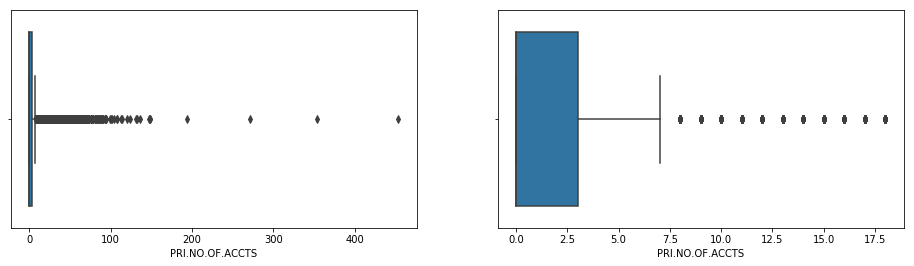

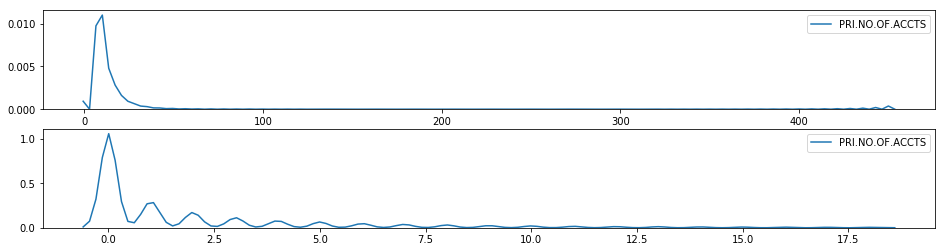

In [367]:
# col = cols[0]
# fig, ax = plt.subplots(1,2,figsize=(16,4))
# sns.boxplot(train_df[col], ax=ax[0])

# tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
# sns.boxplot(tp, ax=ax[1])
# print(tp.shape[0], train_df.shape[0])

# fig, ax = plt.subplots(2,1,figsize=(16,4))
# sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
# sns.kdeplot(tp, ax=ax[1])#,label='1')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 34, 35, 37, 39, 42, 43, 52, 65, 144]


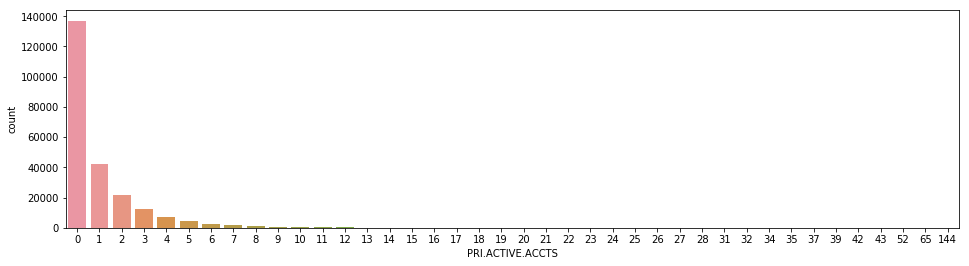

In [69]:
col = 'PRI.ACTIVE.ACCTS'
print(sorted(train_df[col].unique()))
plt.figure(figsize=(16,4))
sns.countplot(train_df[col])

# plt.figure(figsize=(16,4))
# sns.countplot(train_df[col][train_df[col] > 10])


In [73]:
# no_of_acc = train_df.groupby([col,'loan_default'])['loan_default'].count().unstack()
# no_of_acc.columns = ['loan_0','loan_1']
# no_of_acc[no_of_acc.loan_0 < 10]

In [74]:
col = 'PRI.ACTIVE.ACCTS'

bins = pd.IntervalIndex.from_tuples([(-1, 0), (0, 1), (1, 4), (4, 500)])
train_df['no_of_acc'] = pd.cut(train_df[col], bins)
test_df['no_of_acc'] = pd.cut(test_df[col], bins)
print(train_df['no_of_acc'].value_counts())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(train_df['no_of_acc']) + list(test_df['no_of_acc']))
print(le.classes_)
train_df['no_of_acc'] = le.transform(train_df['no_of_acc'])
test_df['no_of_acc']  = le.transform(test_df['no_of_acc'])

print(train_df.groupby(['no_of_acc','loan_default'])['loan_default'].count().unstack())

train_df.drop(col, axis=1, inplace=True)
test_df.drop(col, axis=1, inplace=True)


(-1, 0]     137016
(0, 1]       42055
(1, 4]       41277
(4, 500]     12806
Name: no_of_acc, dtype: int64
[Interval(-1, 0, closed='right') Interval(0, 1, closed='right')
 Interval(1, 4, closed='right') Interval(4, 500, closed='right')]
loan_default       0      1
no_of_acc                  
0             105965  31051
1              32873   9182
2              32906   8371
3              10799   2007


227678 233154


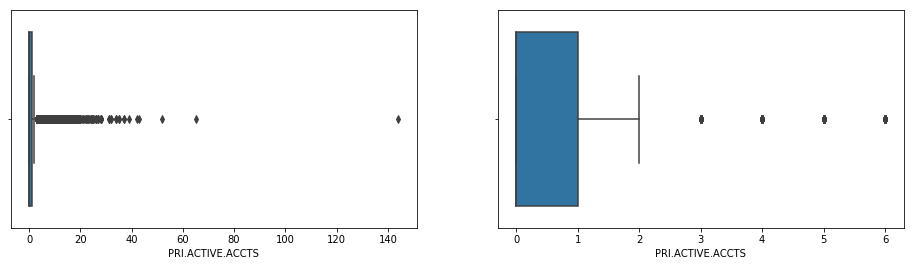

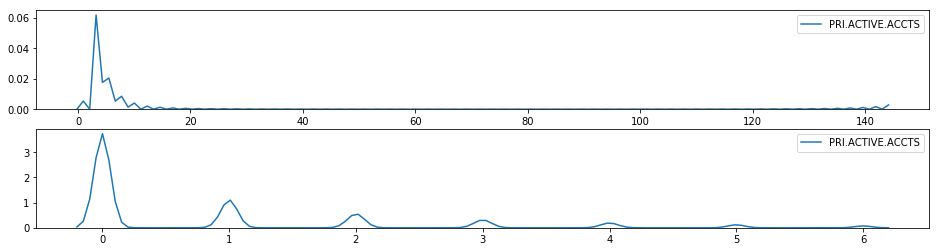

In [368]:
# col = cols[1]
# fig, ax = plt.subplots(1,2,figsize=(16,4))
# sns.boxplot(train_df[col], ax=ax[0])

# tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
# sns.boxplot(tp, ax=ax[1])
# print(tp.shape[0], train_df.shape[0])

# fig, ax = plt.subplots(2,1,figsize=(16,4))
# sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
# sns.kdeplot(tp, ax=ax[1])#,label='1')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 25]


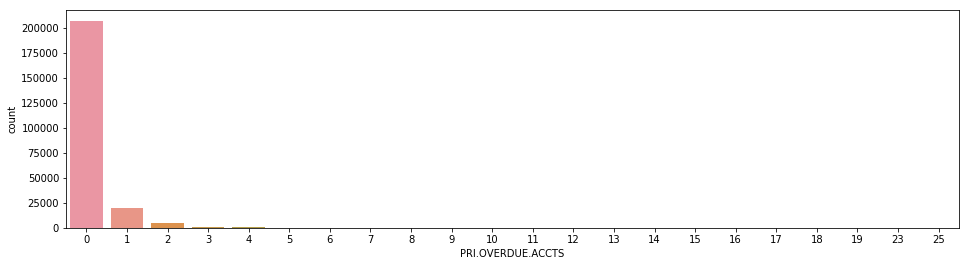

In [76]:
col = 'PRI.OVERDUE.ACCTS'
print(sorted(train_df[col].unique()))
plt.figure(figsize=(16,4))
sns.countplot(train_df[col])

# plt.figure(figsize=(16,4))
# sns.countplot(train_df[col][train_df[col] > 10])


In [77]:
no_of_acc = train_df.groupby([col,'loan_default'])['loan_default'].count().unstack()
no_of_acc.columns = ['loan_0','loan_1']
no_of_acc#[no_of_acc.loan_0 < 10]

,loan_0,loan_1
PRI.OVERDUE.ACCTS,,
0,163471.0,43408.0
1,14588.0,5382.0
2,3061.0,1241.0
3,841.0,361.0
4,284.0,120.0
5,118.0,48.0
6,74.0,22.0
7,31.0,7.0
8,20.0,7.0


In [79]:
col = 'PRI.OVERDUE.ACCTS'
new_col = 'no_of_acc_overdue'

bins = pd.IntervalIndex.from_tuples([(-1, 0), (0, 1), (1, 500)])
train_df[new_col] = pd.cut(train_df[col], bins)
test_df[new_col] = pd.cut(test_df[col], bins)
print(train_df[new_col].value_counts())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(train_df[new_col]) + list(test_df[new_col]))
print(le.classes_)
train_df[new_col] = le.transform(train_df[new_col])
test_df[new_col]  = le.transform(test_df[new_col])

print(train_df.groupby([new_col,'loan_default'])['loan_default'].count().unstack())

train_df.drop(col, axis=1, inplace=True)
test_df.drop(col, axis=1, inplace=True)


[Interval(-1, 0, closed='right') Interval(0, 1, closed='right')
 Interval(1, 500, closed='right')]
loan_default            0      1
no_of_acc_overdue               
0                  163471  43408
1                   14588   5382
2                    4484   1821


226849 233154


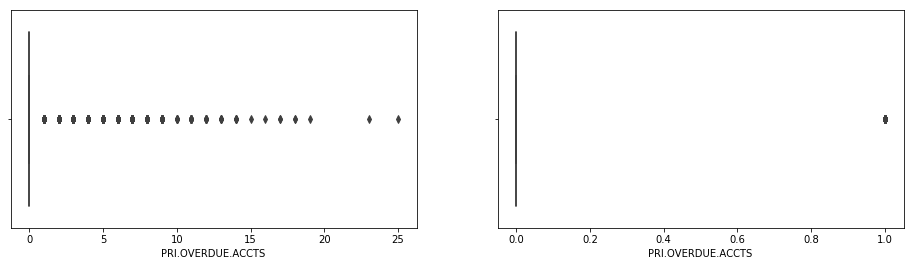

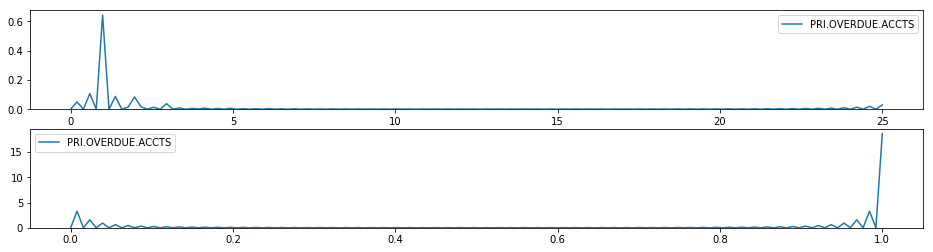

In [369]:
# col = cols[2]
# fig, ax = plt.subplots(1,2,figsize=(16,4))
# sns.boxplot(train_df[col], ax=ax[0])

# tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
# sns.boxplot(tp, ax=ax[1])
# print(tp.shape[0], train_df.shape[0])

# fig, ax = plt.subplots(2,1,figsize=(16,4))
# sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
# sns.kdeplot(tp, ax=ax[1])#,label='1')

/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


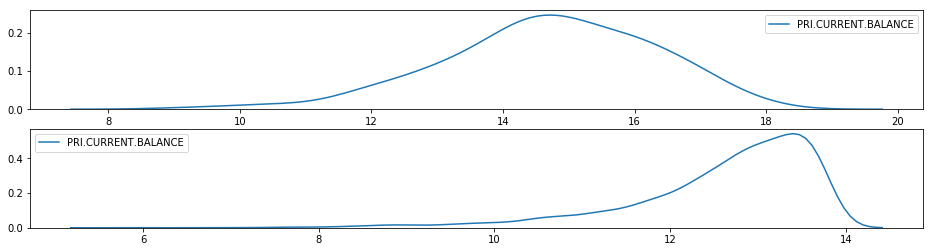

In [390]:
fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(np.log(2+train_df[col]+train_df[col].min()), ax=ax[0])#,label='0')
sns.kdeplot(np.log(2+tp+tp.min()), ax=ax[1])#,label='1')

## new feature, no of active accounts before and after loan, Please take care of noise in both cols

In [86]:
train_df['diff_no_of_acc'] = (train_df_save[cols[1]] - train_df_save[cols[2]])
train_df['diff_no_of_acc'].value_counts().sort_index()

-12          1
-11          2
-10          4
-9           4
-8           2
-7           5
-6           5
-5          11
-4          37
-3          84
-2         320
-1        2132
 0      144085
 1       39548
 2       19395
 3       10680
 4        6341
 5        3799
 6        2289
 7        1484
 8         958
 9         609
 10        404
 11        277
 12        195
 13        141
 14         84
 15         69
 16         44
 17         35
 18         28
 19         16
 20          9
 21          9
 22          7
 23         13
 24          5
 25          5
 26          1
 27          3
 28          2
 30          1
 31          3
 34          1
 35          2
 38          1
 41          1
 51          1
 64          1
 141         1
Name: diff_no_of_acc, dtype: int64

In [89]:
cols

['PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT']

In [90]:
col = 'diff_no_of_acc'
new_col = 'diff_of_acc'

train_df[col] = (train_df_save['PRI.ACTIVE.ACCTS'] - train_df_save['PRI.OVERDUE.ACCTS'])
test_df[col]  = (test_df_save['PRI.ACTIVE.ACCTS'] - test_df_save['PRI.OVERDUE.ACCTS'])

bins = pd.IntervalIndex.from_tuples([(-50, -1), (-1, 0), (0, 1), (1, 4), (4, 500)])
train_df[new_col] = pd.cut(train_df[col], bins)
test_df[new_col] = pd.cut(test_df[col], bins)
print(train_df[new_col].value_counts())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(train_df[new_col]) + list(test_df[new_col]))
print(le.classes_)
train_df[new_col] = le.transform(train_df[new_col])
test_df[new_col]  = le.transform(test_df[new_col])

print(train_df.groupby([new_col,'loan_default'])['loan_default'].count().unstack())

train_df.drop(col, axis=1, inplace=True)
test_df.drop(col, axis=1, inplace=True)


(-1, 0]      144085
(0, 1]        39548
(1, 4]        36416
(4, 500]      10498
(-50, -1]      2607
Name: diff_of_acc, dtype: int64
[Interval(-50, -1, closed='right') Interval(-1, 0, closed='right')
 Interval(0, 1, closed='right') Interval(1, 4, closed='right')
 Interval(4, 500, closed='right')]
loan_default       0      1
diff_of_acc                
0               1891    716
1             110678  33407
2              31347   8201
3              29560   6856
4               9067   1431


In [ ]:
# Application amount: This is the amount you are applying for. You might want to apply for a loan of 40 lakhs to pursue your higher studies.
# Sanctioned amount: This is the amount that the bank has approved you for after their due diligence. This will be less than or equal to the application amount. In the case mentioned above, it might happen that the bank can only approve you for a loan for 30 lakhs due to any number of reasons.
# Disbursed amount: The amount that has been used from the sanctioned amount. It might happen that you were approved for 30 lakhs. But you received a scholarship, or decided to use your savings to fund your education. You only take 5 lakhs from the bank as the loan. This is the disbursed amount
    
25 	PRI.CURRENT.BALANCE 	total Principal outstanding amount of the acti... 	The outstanding amount is the Total due of your loan that you need to pay to the bank including interest and principal till date. Its nothing but the total loan amount sanctioned minus the pricipal part part of ur EMI.
26 	PRI.SANCTIONED.AMOUNT 	total amount that was sanctioned for all the l... 	NaN
27 	PRI.DISBURSED.AMOUNT 	total amount that was disbursed for all the lo... 	NaN


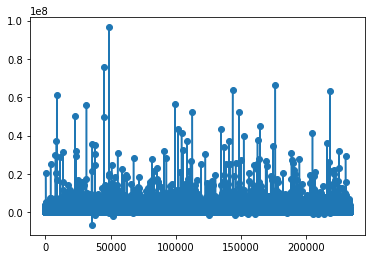

In [91]:
col = cols[3]

plt.plot(train_df[col],'-o')

In [92]:
# train_df[train_df[col]>4000000][[col,cols[4],cols[5],'loan_default']]
train_df[train_df[col]>3000000]['loan_default'].value_counts()


0    1926
1     301
Name: loan_default, dtype: int64

# Drop all the rows with income more than `30Lakh`, which is only 1% of data, will not hurt too much(I guess)

In [95]:
100*train_df[train_df[col]>3000000][[col,cols[4],cols[5],'loan_default']].shape[0]/train_df.shape[0],\
100*test_df[test_df[col]>3000000][[col,cols[4],cols[5]]].shape[0]/test_df.shape[0]

(0.9551626821757293, 0.8078866823261442)

In [96]:
100*train_df[train_df[col]<0][[col,cols[4],cols[5]]].shape[0]/train_df.shape[0],\
100*test_df[test_df[col]<0][[col,cols[4],cols[5]]].shape[0]/test_df.shape[0]


(0.19214767921631196, 0.19396398320165137)

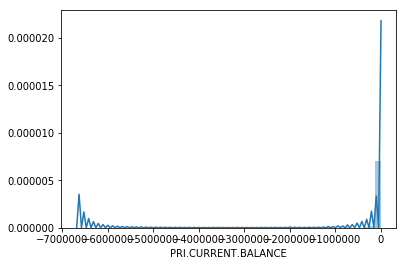

In [108]:
# plt.plot(train_df[train_df[col]<0][col],'-o')#[[col,cols[4],cols[5],'loan_default']]
sns.distplot(train_df[train_df[col]<0][col])

In [123]:
train_df[train_df[col]<0].shape, test_df[test_df[col]<0].shape,\
train_df[train_df[col]<-10000].shape, test_df[test_df[col]<-10000].shape

((448, 49), (218, 48), (98, 49), (47, 48))

0    383
1     65
Name: loan_default, dtype: int64

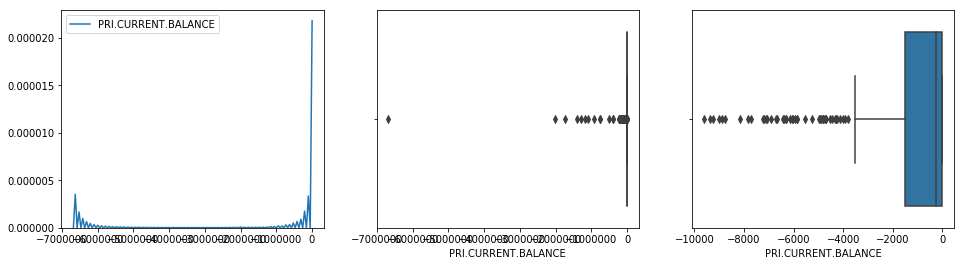

In [129]:
fig, ax = plt.subplots(1,3,figsize=(16,4))
sns.kdeplot(train_df[train_df[col]<0][col], ax=ax[0])
sns.boxplot(train_df[train_df[col]<0][col], ax=ax[1])
sns.boxplot(train_df[(train_df[col]<0)&(train_df[col]>-10000)][col], ax=ax[2])

train_df[train_df[col]<0]['loan_default'].value_counts()

In [133]:
# train_df[(train_df[col]<0)&(train_df[col]>-10000)][col]
def apply_income(x):
    if x>-10000:
        return x
    else:
        return -10000
train_df[col].apply(lambda x: apply_income(x)).value_counts()

# Or this and better
# train_df[col].apply(lambda x: x if x>-10000 else -10000).value_counts()

 0          141696
 800           121
 400           119
 30000         100
-10000          98
 50000          84
 100000         83
 40000          77
 25000          73
 20000          66
 60000          61
 35000          57
 10000          55
 5000           54
 1200           50
 2000           48
 3000           45
 15000          44
 1              43
 58000          42
 1600           41
 12000          40
 1500           40
 6000           40
 55000          39
 70000          39
 10             38
 52000          35
 48000          34
 200000         33
             ...  
 19520           1
 21571           1
 27716           1
 167333          1
 1496211         1
 140429          1
 660619          1
 154754          1
 126068          1
 765712          1
 341103          1
 601196          1
 66665           1
 593000          1
 95335           1
 97382           1
 1928292         1
 601392          1
 42077           1
 44124           1
 302170          1
 33881      

In [139]:
train_df['negative_income'] = train_df[col].apply(lambda x: 1 if x<1 else 0)
test_df['negative_income']  = test_df[col].apply(lambda x: 1 if x<1 else 0)

col = 'PRI.CURRENT.BALANCE'
new_col = 'income_status'

bins = pd.IntervalIndex.from_tuples([(-1e9,-1),(-1,0),(0,10000),(10000,500000), 
                                     (500000, 3000000), (3000000,1e11)])
train_df[new_col] = pd.cut(train_df[col], bins)
test_df[new_col] = pd.cut(test_df[col], bins)
print(train_df[new_col].value_counts())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(train_df[new_col]) + list(test_df[new_col]))
print(le.classes_)
train_df[new_col] = le.transform(train_df[new_col])
test_df[new_col]  = le.transform(test_df[new_col])

print(train_df.groupby([new_col,'loan_default'])['loan_default'].count().unstack())


(-1.0, 0.0]                    141696
(10000.0, 500000.0]             59566
(0.0, 10000.0]                  14611
(500000.0, 3000000.0]           14606
(3000000.0, 100000000000.0]      2227
(-1000000000.0, -1.0]             448
Name: income_status, dtype: int64
[Interval(-1000000000.0, -1.0, closed='right')
 Interval(-1.0, 0.0, closed='right')
 Interval(0.0, 10000.0, closed='right')
 Interval(10000.0, 500000.0, closed='right')
 Interval(500000.0, 3000000.0, closed='right')
 Interval(3000000.0, 100000000000.0, closed='right')]
loan_default        0      1
income_status               
0                 383     65
1              109716  31980
2               11539   3072
3               46652  12914
4               12327   2279
5                1926    301


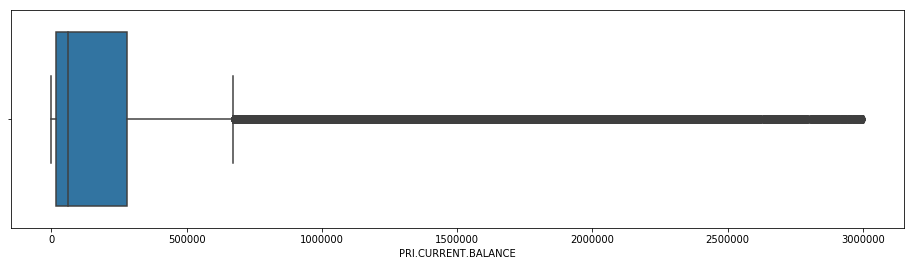

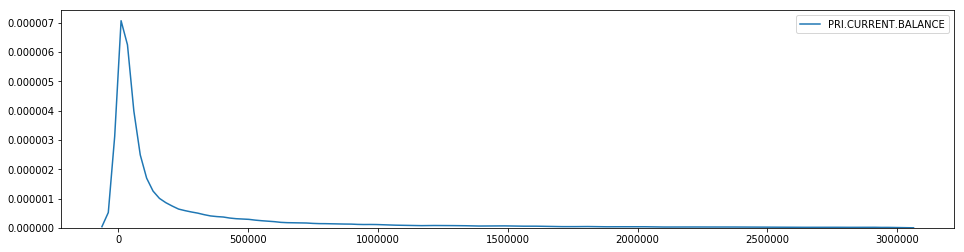

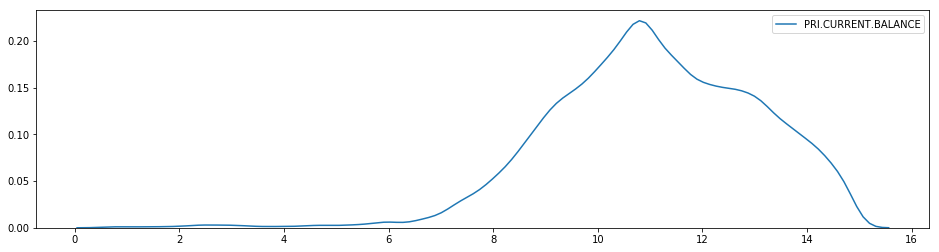

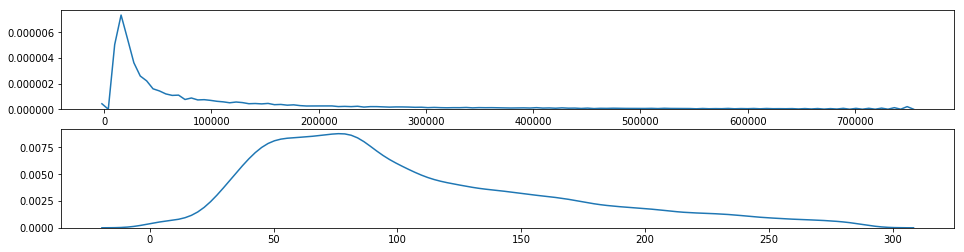

In [145]:
fig, ax = plt.subplots(figsize=(16,4))
sns.boxplot(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col], ax=ax)

fig, ax = plt.subplots(figsize=(16,4))
sns.kdeplot(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col])


# fig, ax = plt.subplots(figsize=(16,4))
# sns.kdeplot(boxcox(train_df[col]-train_df[col].min()+1)[0])



fig, ax = plt.subplots(figsize=(16,4))
sns.kdeplot(np.log(1+train_df[(train_df[col]<3000000) & (train_df[col]>0)][col]))

# scipy.stats.boxcox(x, lmbda=None, alpha=None)
# y = (x**lmbda - 1) / lmbda,  for lmbda > 0
#     log(x),                  for lmbda = 0
# def boxcox_func(x, lambda_):
#     return x**lambda_ -1
from scipy.stats import boxcox
fig, ax = plt.subplots(2,1, figsize=(16,4))
sns.kdeplot(boxcox(train_df[(train_df[col]<3000000) & 
                            (train_df[col]>-10000)][col]+10000,0.9), ax=ax[0])
sns.kdeplot(boxcox(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col],0.3), ax=ax[1])
# boxcox(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col])

230914 233154
-6678296 96524920 -2018309 2990946


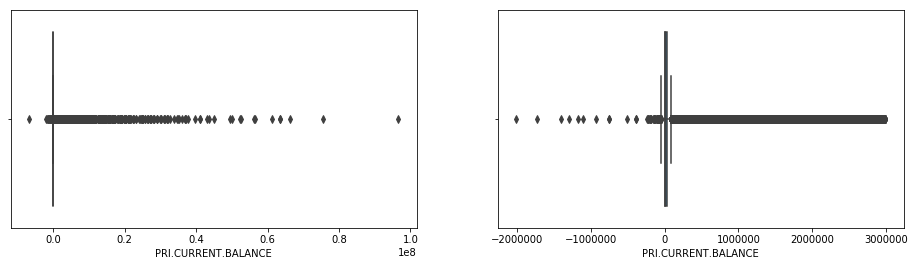

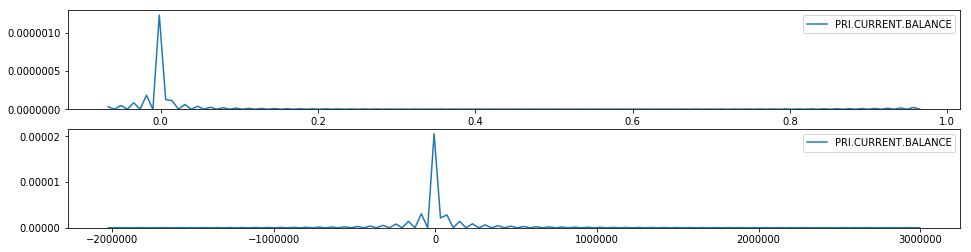

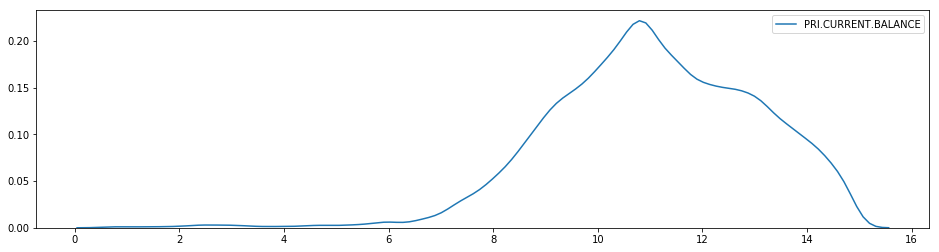

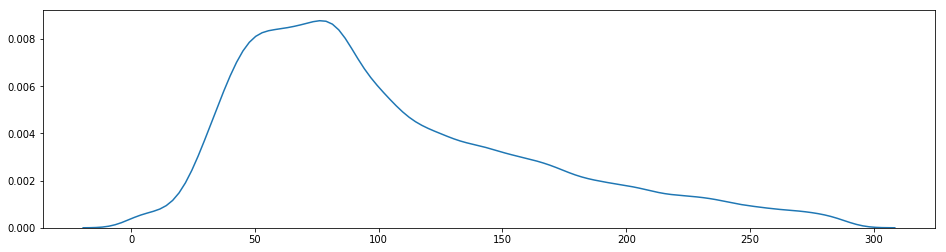

In [518]:
col = cols[3]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
# tp = pd.DataFrame(tp, columns=[col])
# tp = tp[col][(np.abs(stats.zscore(tp[[col]])) < 3).all(axis=1)]

sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])
print(train_df[col].min(), train_df[col].max(), tp.min(), tp.max())

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

fig, ax = plt.subplots(figsize=(16,4))
sns.kdeplot(np.log(1+train_df[(train_df[col]<3000000) & (train_df[col]>0)][col]))

from scipy.stats import boxcox
fig, ax = plt.subplots(figsize=(16,4))
sns.kdeplot(boxcox(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col],0.3))
# boxcox(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col])

PRI.SANCTIONED.AMOUNT
232537 233154


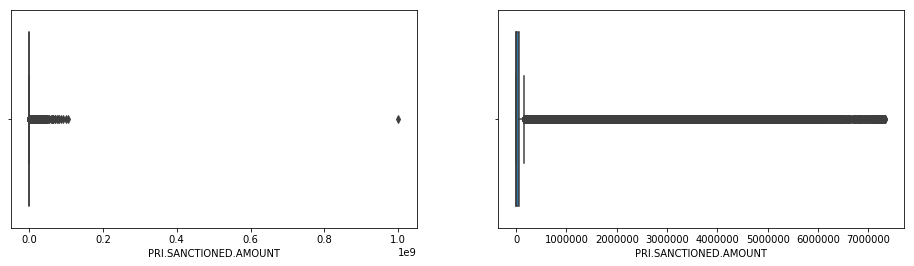

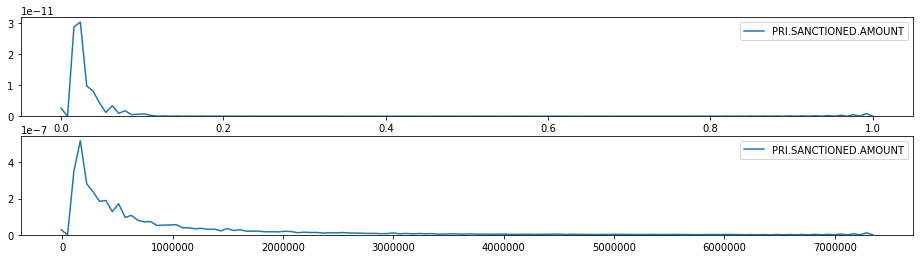

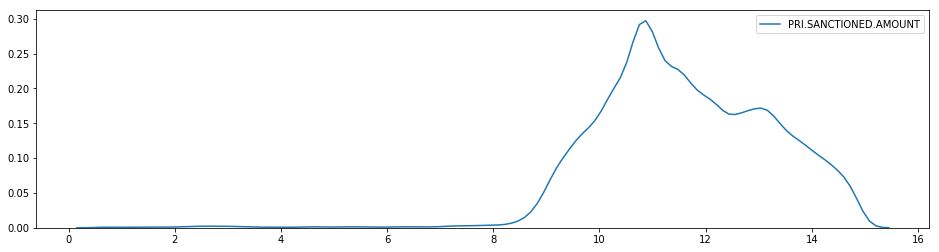

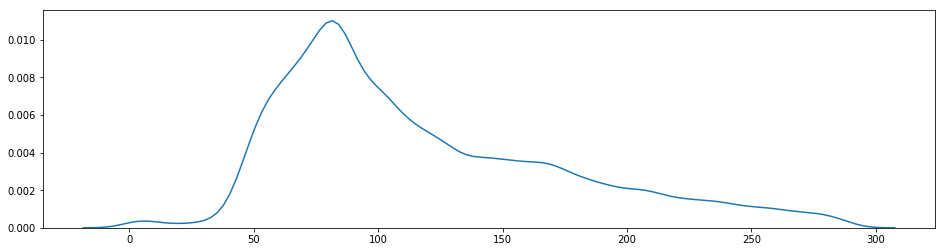

In [520]:
col = cols[4]
print(col)
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

fig, ax = plt.subplots(figsize=(16,4))
sns.kdeplot(np.log(1+train_df[(train_df[col]<3000000) & (train_df[col]>0)][col]))

# scipy.stats.boxcox(x, lmbda=None, alpha=None)
# y = (x**lmbda - 1) / lmbda,  for lmbda > 0
#     log(x),                  for lmbda = 0
# def boxcox_func(x, lambda_):
#     return x**lambda_ -1
from scipy.stats import boxcox
fig, ax = plt.subplots(figsize=(16,4))
sns.kdeplot(boxcox(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col],0.3))
# boxcox(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col])

232538 233154


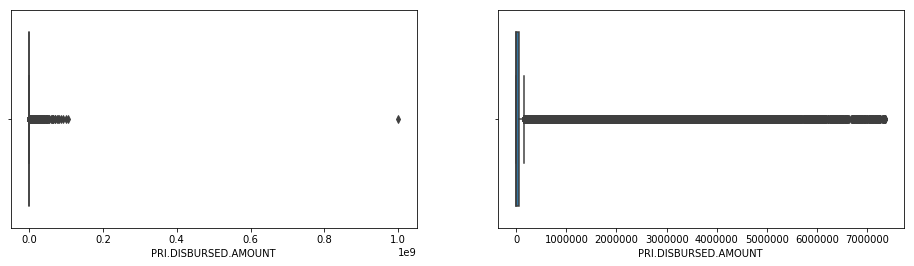

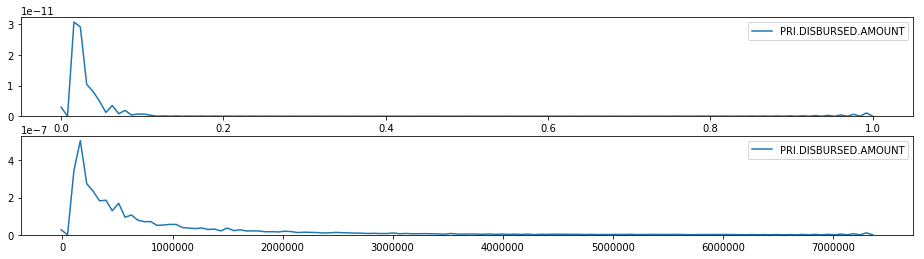

In [372]:
col = cols[5]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

In [148]:
cols[5]

'PRI.DISBURSED.AMOUNT'

In [529]:
train_df[train_df[cols[3]] > 0][[cols[3],cols[4],cols[5]]].shape, train_df.shape

((91010, 3), (233154, 47))

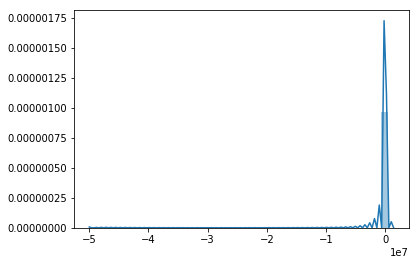

In [532]:
sns.distplot(train_df[train_df[cols[3]] > 0][cols[4]]-train_df[train_df[cols[3]] > 0][cols[5]])

/home/ankish/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/ankish/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


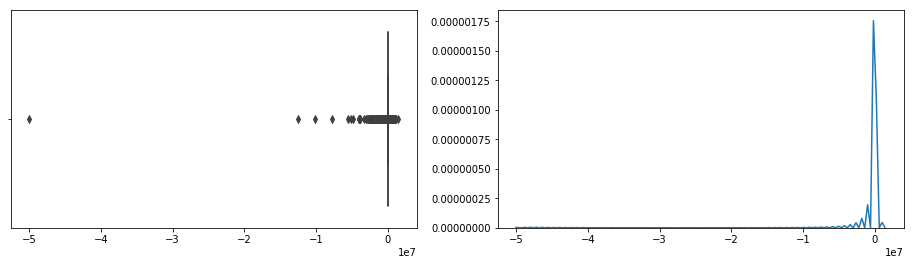

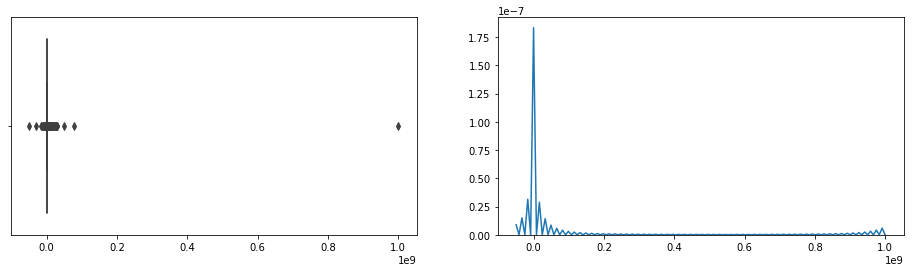

In [528]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[cols[4]]-train_df[cols[5]], ax=ax[0])
sns.kdeplot(train_df[cols[4]]-train_df[cols[5]], ax=ax[1])#,label='0')

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[train_df[cols[3]] > 0][cols[4]]-train_df[train_df[cols[5]] > 0][cols[3]], ax=ax[0])
sns.kdeplot(train_df[train_df[cols[3]] > 0][cols[4]]-train_df[train_df[cols[5]] > 0][cols[3]], ax=ax[1])#,label='0')


In [527]:
cols

['PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT']

231883 233154


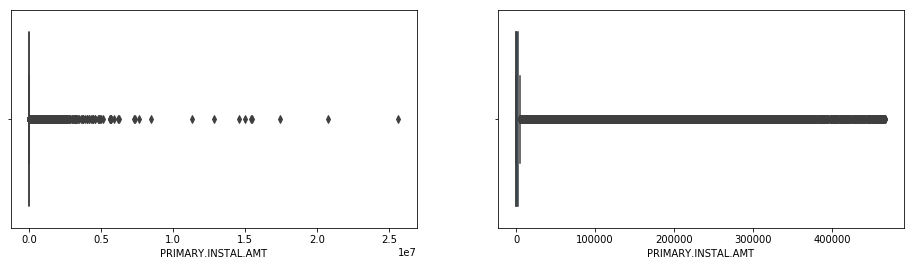

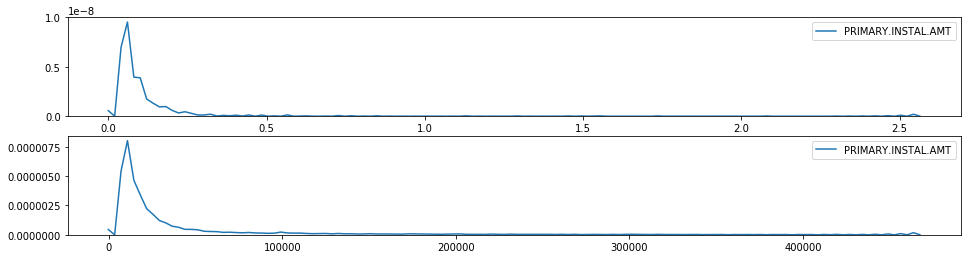

In [373]:
col = cols[6]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

In [149]:
train_df_save1 = train_df.copy()
test_df_save1 = test_df.copy()

train_df_save.shape, train_df_save1.shape

((233154, 47), (233154, 51))

In [155]:

# target = train_df['loan_default']
# train_df.drop(['UniqueID','loan_default'], axis=1, inplace=True)
# test_df.drop('UniqueID', axis=1, inplace=True)

train_df[['credit_hist_year','credit_hist_month','loan_tenure_year','loan_tenure_month']] = \
train_df[['credit_hist_year','credit_hist_month','loan_tenure_year','loan_tenure_month']].astype('int')
test_df[['credit_hist_year','credit_hist_month','loan_tenure_year','loan_tenure_month']] = \
test_df[['credit_hist_year','credit_hist_month','loan_tenure_year','loan_tenure_month']].astype('int')

from sklearn.model_selection import train_test_split, StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

splits = 4
random_seed = 2019
features = train_df.columns
param = {
    'bagging_freq'           : 5,
    'bagging_fraction'       : 0.33,
    'boost_from_average'     : 'false',
    'boost'                  : 'gbdt',
    'feature_fraction'       : 0.3,
    'learning_rate'          : 0.01,
    'max_depth'              : -1,
    'metric'                 : 'auc',
    'min_data_in_leaf'       : 100,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves'             : 30,
    'num_threads'            : 4,
    'tree_learner'           : 'serial',
    'objective'              : 'binary',
    'verbosity'              : 1,
#     'lambda_l1'              : 0.001,
    'lambda_l2'              : 0.5
}   

n_splits = splits
num_round = 10000
folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
oof_lgb = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))

temp = train_df.apply(lambda x: pd.Series.value_counts(x).shape[0])
cat_columns = list(temp[temp<50].index)

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print(trn_idx.shape, val_idx.shape)
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx],
                          feature_name=list(train_df.columns))#,
#                           categorical_feature=cat_columns)

    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx],
                          feature_name=list(train_df.columns))#,
#                           categorical_feature=cat_columns) 

    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], 
                    verbose_eval=50, early_stopping_rounds = 25)
    oof_lgb[val_idx] = clf.predict(train_df.iloc[val_idx][features], 
                               num_iteration=clf.best_iteration)
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits
    
    print( "  auc = ", roc_auc_score(target.iloc[val_idx], oof_lgb[val_idx]) )
    print("="*60)

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_lgb)))

# sub_df = pd.DataFrame({"ID_code":test_id})
# sub_df["target"] = predictions

# sub_df.columns = sub.columns
# sub_df.to_csv('submission/lightgbm_target_{}.csv'.format(file_path), index=None)


lgb_imp = pd.DataFrame(data=[clf.feature_name(), list(clf.feature_importance())]).T
lgb_imp.columns = ['feature','imp']
lgb_imp = lgb_imp.sort_values(by='imp', ascending=False)
plt.figure(figsize=(12,15))
plt.barh(lgb_imp.feature, lgb_imp.imp)

(174865,) (58289,)
Fold 0
Training until validation scores don't improve for 25 rounds.
[50]	training's auc: 0.660532	valid_1's auc: 0.64924
[100]	training's auc: 0.662125	valid_1's auc: 0.650493
[150]	training's auc: 0.663824	valid_1's auc: 0.651822
[200]	training's auc: 0.66611	valid_1's auc: 0.65321
[250]	training's auc: 0.669116	valid_1's auc: 0.655472
[300]	training's auc: 0.671336	valid_1's auc: 0.656946
[350]	training's auc: 0.673914	valid_1's auc: 0.658606
[400]	training's auc: 0.676017	valid_1's auc: 0.659976
[450]	training's auc: 0.678017	valid_1's auc: 0.661093
[500]	training's auc: 0.680351	valid_1's auc: 0.662147
[550]	training's auc: 0.682148	valid_1's auc: 0.663052
[600]	training's auc: 0.683902	valid_1's auc: 0.663925
[650]	training's auc: 0.68565	valid_1's auc: 0.664514
[700]	training's auc: 0.687061	valid_1's auc: 0.664931
[750]	training's auc: 0.688567	valid_1's auc: 0.665451
[800]	training's auc: 0.690017	valid_1's auc: 0.665962
[850]	training's auc: 0.691388	valid_

KeyboardInterrupt: 

<BarContainer object of 49 artists>

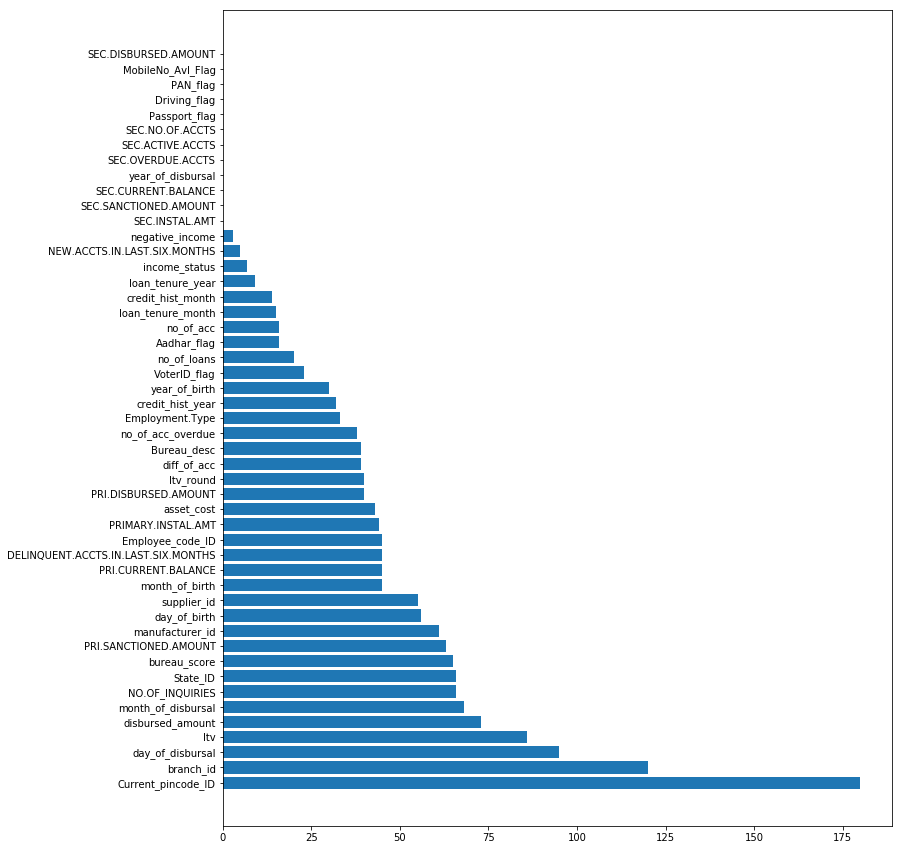

In [156]:
# lgb_imp = pd.DataFrame(data=[clf.feature_name(), list(clf.feature_importance())]).T
# lgb_imp.columns = ['feature','imp']
# lgb_imp = lgb_imp.sort_values(by='imp', ascending=False)
# plt.figure(figsize=(12,15))
# plt.barh(lgb_imp.feature, lgb_imp.imp)

In [160]:
del train_df, test_df
gc.collect()
train_df = train_df_save1.copy()
test_df = test_df_save1.copy()

# Let's investigate other columns

In [157]:
# 28 	SEC.NO.OF.ACCTS 	count of total loans taken by the customer at ... 	Secondary accounts are those which the custome...
# 29 	SEC.ACTIVE.ACCTS 	count of active loans taken by the customer at... 	NaN
# 30 	SEC.OVERDUE.ACCTS 	count of default accounts at the time of disbu... 	NaN

# 31 	SEC.CURRENT.BALANCE 	total Principal outstanding amount of the acti... 	NaN
# 32 	SEC.SANCTIONED.AMOUNT 	total amount that was sanctioned for all the l... 	NaN
# 33 	SEC.DISBURSED.AMOUNT 	total amount that was disbursed for all the lo...

cat_cols = ['SEC.ACTIVE.ACCTS', 'SEC.NO.OF.ACCTS','SEC.OVERDUE.ACCTS']
int_cols = ['SEC.CURRENT.BALANCE', 'SEC.DISBURSED.AMOUNT',
            'SEC.INSTAL.AMT','SEC.SANCTIONED.AMOUNT']

In [158]:
train_df[cat_cols].apply(lambda x: pd.Series.value_counts(x).shape[0])

SEC.ACTIVE.ACCTS     23
SEC.NO.OF.ACCTS      37
SEC.OVERDUE.ACCTS     9
dtype: int64

SEC.ACTIVE.ACCTS
(23, 3)


Text(0.5, 0.98, 'SEC.ACTIVE.ACCTS vs loan-default (in norm)')

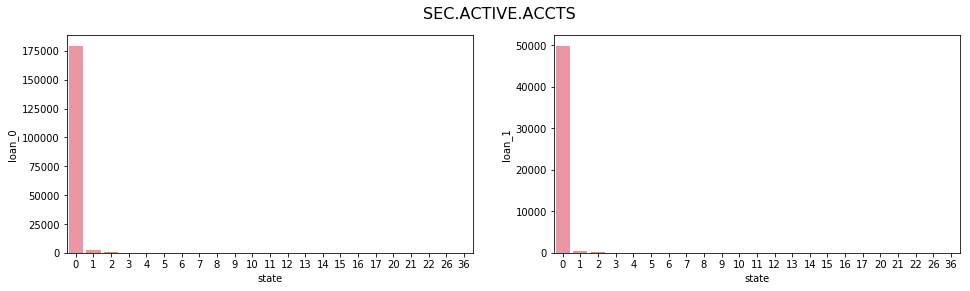

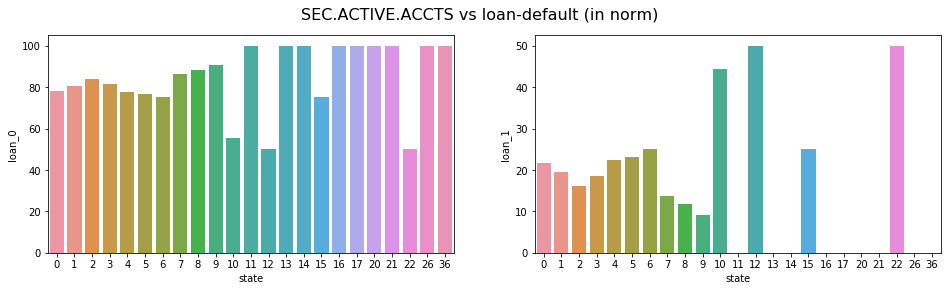

In [161]:
col = cat_cols[0]
print(col)
manufac_gps = train_df.groupby([col,'loan_default'])['loan_default'].count().unstack()
manufac_gps.columns = ['loan_0', 'loan_1']
manufac_gps['state'] = manufac_gps.index
print(manufac_gps.shape)
# manufac_gps[['loan_0']] = 100*manufac_gps[['loan_0']]/train_df.shape[0]
# manufac_gps[['loan_1']] = 100*manufac_gps[['loan_1']]/train_df.shape[0]

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')
fig.suptitle(col, fontsize=16)
    
    
manufac_gps[['loan_0','loan_1']] = 100*manufac_gps[['loan_0','loan_1']].apply(lambda x: x/x.sum(), axis=1)


fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')
fig.suptitle(col+' vs loan-default (in norm)', fontsize=16)


SEC.NO.OF.ACCTS
(37, 3)


Text(0.5, 0.98, 'SEC.NO.OF.ACCTS vs loan-default (in norm)')

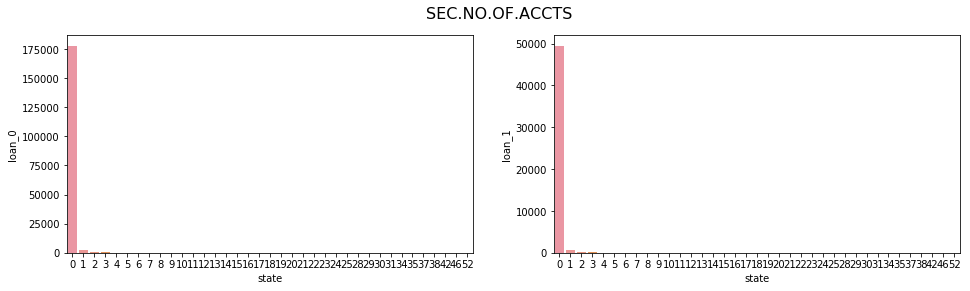

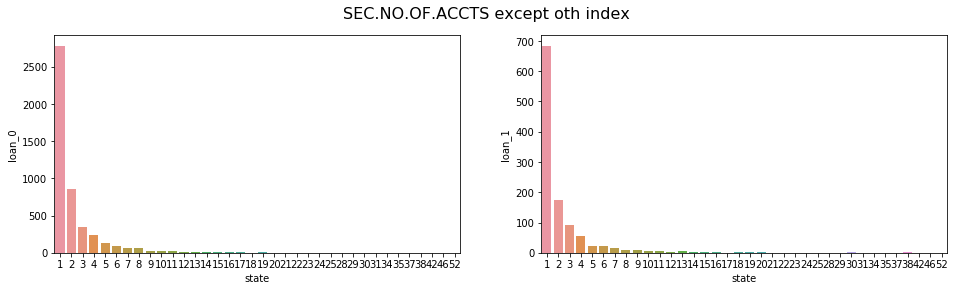

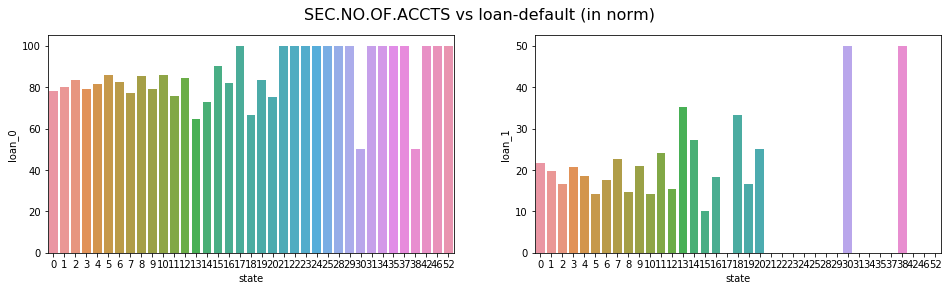

In [166]:
col = cat_cols[1]
print(col)
manufac_gps = train_df.groupby([col,'loan_default'])['loan_default'].count().unstack()
manufac_gps.columns = ['loan_0', 'loan_1']
manufac_gps['state'] = manufac_gps.index
print(manufac_gps.shape)
# manufac_gps[['loan_0']] = 100*manufac_gps[['loan_0']]/train_df.shape[0]
# manufac_gps[['loan_1']] = 100*manufac_gps[['loan_1']]/train_df.shape[0]

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')
fig.suptitle(col, fontsize=16)


fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps.iloc[1:,:], ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps.iloc[1:,:], ax=ax[1])#,label='1')
fig.suptitle(col+" except oth index", fontsize=16)

manufac_gps[['loan_0','loan_1']] = 100*manufac_gps[['loan_0','loan_1']].apply(lambda x: x/x.sum(), axis=1)

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')
fig.suptitle(col+' vs loan-default (in norm)', fontsize=16)


SEC.OVERDUE.ACCTS
(9, 3)


Text(0.5, 0.98, 'SEC.OVERDUE.ACCTS vs loan-default (in norm)')

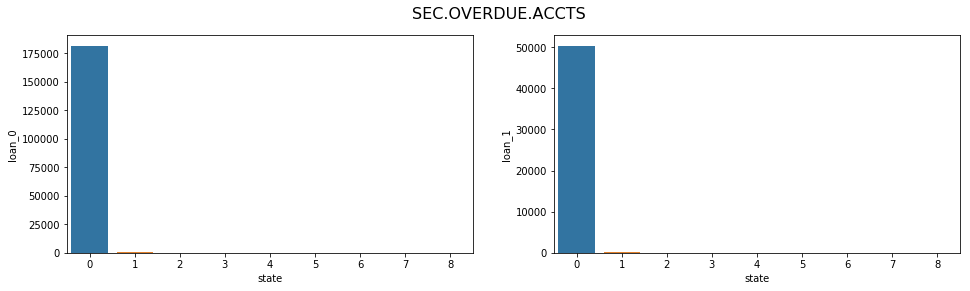

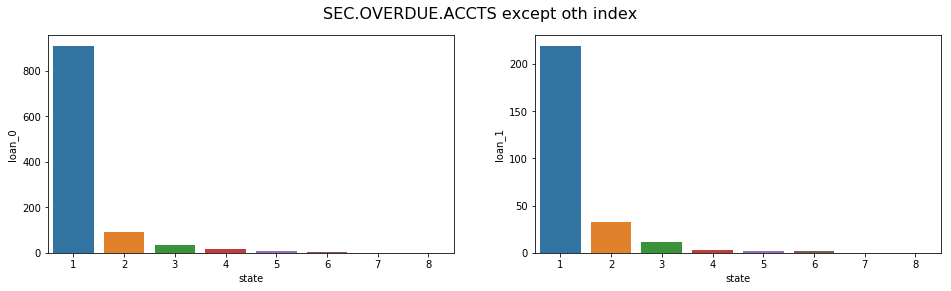

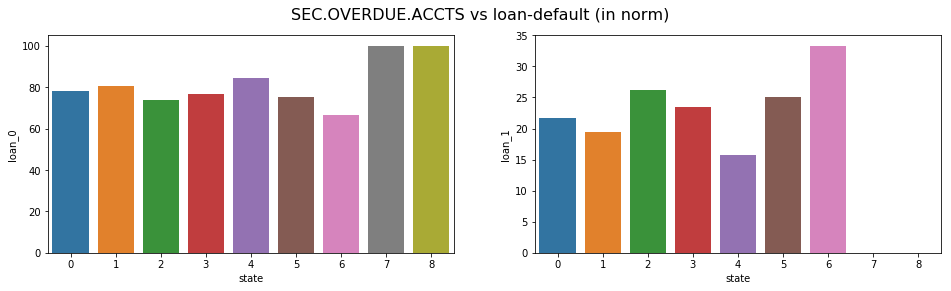

In [167]:
col = cat_cols[2]
print(col)
manufac_gps = train_df.groupby([col,'loan_default'])['loan_default'].count().unstack()
manufac_gps.columns = ['loan_0', 'loan_1']
manufac_gps['state'] = manufac_gps.index
print(manufac_gps.shape)
# manufac_gps[['loan_0']] = 100*manufac_gps[['loan_0']]/train_df.shape[0]
# manufac_gps[['loan_1']] = 100*manufac_gps[['loan_1']]/train_df.shape[0]

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')
fig.suptitle(col, fontsize=16)


fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps.iloc[1:,:], ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps.iloc[1:,:], ax=ax[1])#,label='1')
fig.suptitle(col+" except oth index", fontsize=16)


manufac_gps[['loan_0','loan_1']] = 100*manufac_gps[['loan_0','loan_1']].apply(lambda x: x/x.sum(), axis=1)

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')
fig.suptitle(col+' vs loan-default (in norm)', fontsize=16)


In [168]:
train_df[cat_cols[0]].value_counts(), \
train_df[cat_cols[1]].value_counts(), \
train_df[cat_cols[2]].value_counts()

(0     229337
 1       2684
 2        636
 3        195
 4        116
 5         65
 6         32
 7         22
 8         17
 9         11
 10         9
 11         7
 12         6
 15         4
 13         3
 16         2
 22         2
 26         1
 14         1
 17         1
 20         1
 21         1
 36         1
 Name: SEC.ACTIVE.ACCTS, dtype: int64, 0     227289
 1       3466
 2       1036
 3        444
 4        292
 5        148
 6        119
 7         75
 8         68
 9         38
 10        35
 11        29
 13        17
 12        13
 16        11
 14        11
 15        10
 18         6
 19         6
 17         5
 20         4
 22         4
 23         4
 31         4
 21         3
 46         2
 24         2
 38         2
 30         2
 34         2
 37         1
 42         1
 28         1
 35         1
 29         1
 25         1
 52         1
 Name: SEC.NO.OF.ACCTS, dtype: int64, 0    231817
 1      1129
 2       126
 3        47
 4        19
 5         8
 6     

In [169]:
use_index = train_df[cat_cols[0]][train_df[cat_cols[0]]>0].index
train_df.loc[use_index, cat_cols[0]] = 1

use_index = train_df[cat_cols[1]][train_df[cat_cols[1]]>0].index
train_df.loc[use_index, cat_cols[1]] = 1

use_index = train_df[cat_cols[2]][train_df[cat_cols[2]]>0].index
train_df.loc[use_index, cat_cols[2]] = 1


# We need to categorize these `SEC` int columns

232642 233154


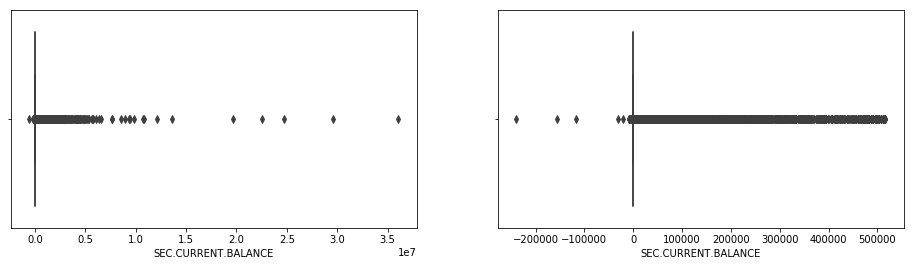

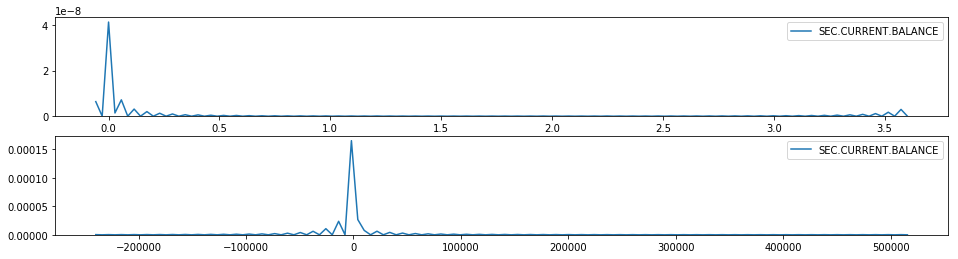

In [552]:
col = int_cols[0]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

232531 233154


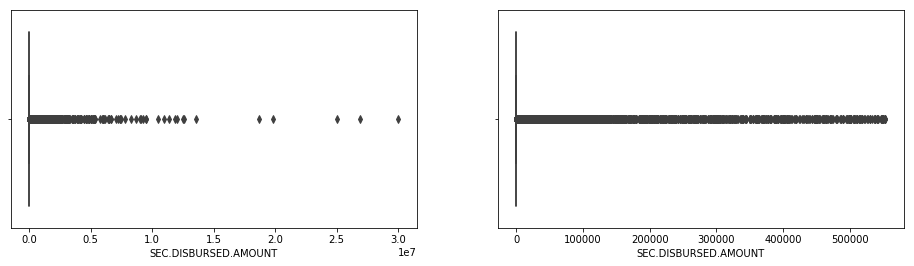

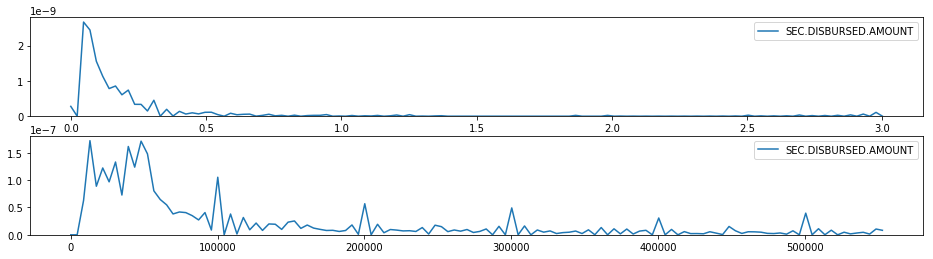

In [553]:
col = int_cols[1]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

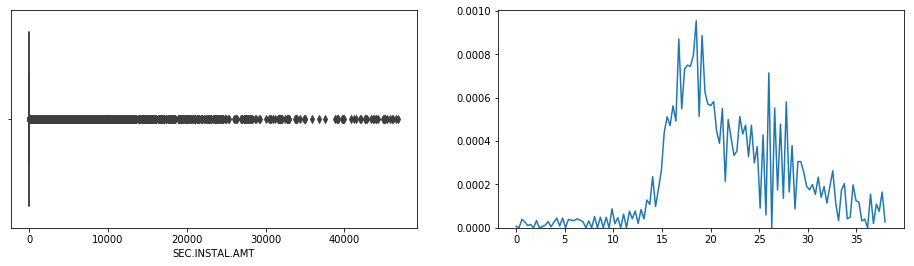

In [601]:
col = int_cols[2]
temp = train_df[train_df['PRI.CURRENT.BALANCE']<3000000][[int_cols[2]]]
tp = temp[col][(np.abs(stats.zscore(temp[[col]])) < 3).all(axis=1)]

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(tp, ax=ax[0])
sns.kdeplot(boxcox(1+tp,lmbda=0.2),ax=ax[1])


In [603]:
tp[tp != 0]

154        9382
296        6485
316        1563
331        1065
403        1330
683        5185
710        2372
1538       1345
1589       3290
1718       9419
1759       1812
1768       2563
2038      12568
2113      14463
2212       1736
2215      10571
2247       4021
2262      15504
2286       1213
2302      45171
2308      12870
2362        433
2394       3171
2539       5813
2621       1676
2991      10575
3245       6889
3246       1534
3249        198
3280      20211
          ...  
226319    14870
226368      277
226508     7300
226793    19033
226988     4664
227666      982
229223    13302
229250     5000
229316      800
229849     6779
230169    10076
230233     1079
230239     3965
230247    17000
230399     2348
230431    10432
231198      625
231212     5082
231491    16807
231838     1232
231855      684
231868     2600
231967     2337
231970     4001
232159     9408
232173     1410
232174     1743
232348     2665
232675     2917
232829     3500
Name: SEC.INSTAL.AMT, Le

232912 233154


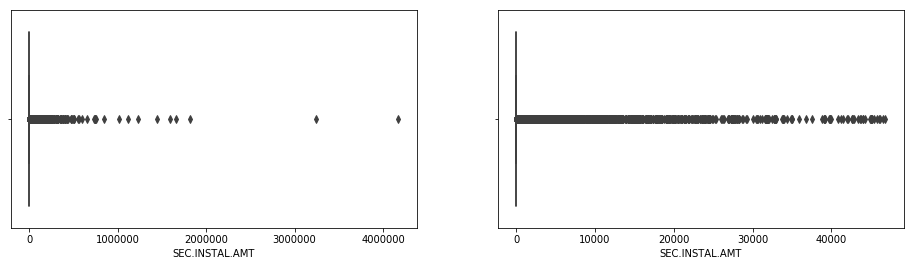

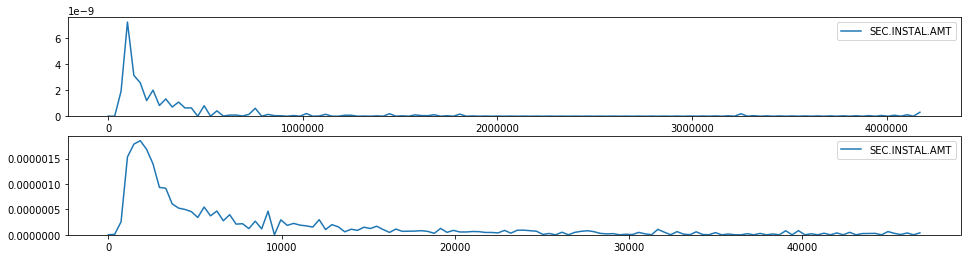

In [550]:
col = int_cols[2]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

232522 233154


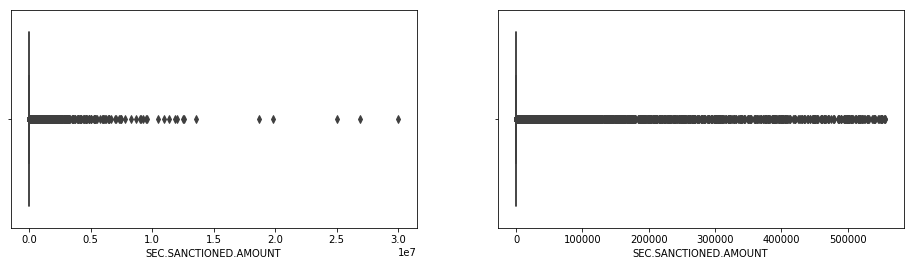

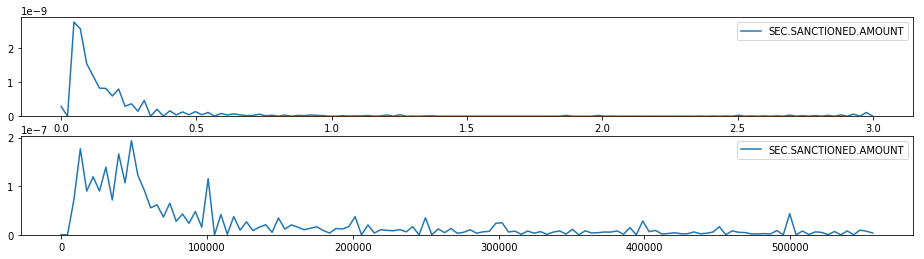

In [551]:
col = int_cols[3]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

In [176]:
int_cols

['SEC.CURRENT.BALANCE',
 'SEC.DISBURSED.AMOUNT',
 'SEC.INSTAL.AMT',
 'SEC.SANCTIONED.AMOUNT']

# I mess with `SEC.ACTIVE.ACCTS`, do all operation on this variable again

In [177]:
# New loans taken by the customer in last 6 mont... 	
train_df['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     181494
1      32099
2      11015
3       4458
4       1957
5        964
6        480
7        302
8        147
9         79
10        55
11        31
12        20
13        15
14        11
16         6
17         6
20         3
15         2
18         2
19         2
23         2
28         1
21         1
22         1
35         1
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [178]:
use_index = train_df['NEW.ACCTS.IN.LAST.SIX.MONTHS'][
    train_df['NEW.ACCTS.IN.LAST.SIX.MONTHS']>1].index
train_df.loc[use_index, 'NEW.ACCTS.IN.LAST.SIX.MONTHS'] = 2
print(use_index.shape)
print(train_df['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts())

use_index = test_df['NEW.ACCTS.IN.LAST.SIX.MONTHS'][
    test_df['NEW.ACCTS.IN.LAST.SIX.MONTHS']>1].index
test_df.loc[use_index, 'NEW.ACCTS.IN.LAST.SIX.MONTHS'] = 2
print(use_index.shape)
print(test_df['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts())


(19561,)
0    181494
1     32099
2     19561
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64
(7679,)
0    90847
1    13866
2     7679
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64


In [609]:
# DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS: When a loan defaults, it is sent to a debt collection agency whose job is to contact the borrower and receive the unpaid funds. 

train_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     214959
1      14941
2       2470
3        537
4        138
5         58
6         20
7         13
8          7
12         3
11         3
10         2
9          2
20         1
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [179]:
use_index = train_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'][
    train_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']>1].index
train_df.loc[use_index, 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] = 2
print(use_index.shape)
print(train_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts())

use_index = test_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'][
    test_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']>1].index
test_df.loc[use_index, 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] = 2
print(use_index.shape)
test_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

# train_df.groupby(['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','loan_default'])['loan_default'].count().unstack()

(3254,)
0    214959
1     14941
2      3254
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64
(1464,)


0    104185
1      6743
2      1464
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [ ]:
# 14 	MobileNo_Avl_Flag 	if Mobile no. was shared by the customer then ... 	NaN
# 15 	Aadhar_flag 	if aadhar was shared by the customer then flag... 	NaN
# 16 	PAN_flag 	if pan was shared by the customer then flagged... 	NaN
# 17 	VoterID_flag 	if voter was shared by the customer then flag... 	NaN
# 18 	Driving_flag 	if DL was shared by the customer then flagged ... 	NaN
# 19 	Passport_flag 	if passport was shared by the customer then fl... 	NaN


In [180]:
cols = ['MobileNo_Avl_Flag','Aadhar_flag','PAN_flag','VoterID_flag',
        'Driving_flag','Passport_flag']
train_df[cols].apply(lambda x: pd.Series.value_counts(x))

,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag
0,NaN,37230,215533,199360,227735,232658
1,233154.0,195924,17621,33794,5419,496


In [181]:
train_df.drop('MobileNo_Avl_Flag', axis=1, inplace=True)
test_df.drop('MobileNo_Avl_Flag', axis=1, inplace=True)


In [ ]:
# 0  UniqueID 	Identifier for customers 	NaN
# 1  loan_default 	Payment default in the first EMI on due date 	NaN
# 2  disbursed_amount 	Amount of Loan disbursed 	NaN
# 3  asset_cost 	Cost of the Asset 	NaN
# 4  ltv 	Loan to Value of the asset 	NaN
# 5  branch_id 	Branch where the loan was disbursed 	NaN
# 6  supplier_id 	Vehicle Dealer where the loan was disbursed 	NaN
# 7  manufacturer_id 	Vehicle manufacturer(Hero, Honda, TVS etc.) 	NaN
# 8  Current_pincode 	Current pincode of the customer 	NaN
# 9  Date.of.Birth 	Date of birth of the customer 	NaN
# 10 Employment.Type 	Employment Type of the customer (Salaried/Self... 	NaN
# 11 DisbursalDate 	Date of disbursement 	NaN
# 12 State_ID 	State of disbursement 	NaN
# 13 Employee_code_ID 	Employee of the organization who logged the di... 	NaN

# 22 PRI.NO.OF.ACCTS 	count of total loans taken by the customer at ... 	Primary accounts are those which the customer ...
# 23 PRI.ACTIVE.ACCTS 	count of active loans taken by the customer at... 	NaN
# 24 PRI.OVERDUE.ACCTS 	count of default accounts at the time of disbu... 	NaN
# 25 PRI.CURRENT.BALANCE 	total Principal outstanding amount of the acti... 	NaN
# 26 PRI.SANCTIONED.AMOUNT 	total amount that was sanctioned for all the l... 	NaN
# 27 PRI.DISBURSED.AMOUNT 	total amount that was disbursed for all the lo... 	NaN
# 28 SEC.NO.OF.ACCTS 	count of total loans taken by the customer at ... 	Secondary accounts are those which the custome...
# 29 SEC.ACTIVE.ACCTS 	count of active loans taken by the customer at... 	NaN
# 30 SEC.OVERDUE.ACCTS 	count of default accounts at the time of disbu... 	NaN
# 31 SEC.CURRENT.BALANCE 	total Principal outstanding amount of the acti... 	NaN
# 32 SEC.SANCTIONED.AMOUNT 	total amount that was sanctioned for all the l... 	NaN
# 33 SEC.DISBURSED.AMOUNT 	total amount that was disbursed for all the lo... 	NaN
# 34 PRIMARY.INSTAL.AMT 	EMI Amount of the primary loan 	NaN
# 35 SEC.INSTAL.AMT 	EMI Amount of the secondary loan 	NaN
# 36 NEW.ACCTS.IN.LAST.SIX.MONTHS 	New loans taken by the customer in last 6 mont... 	NaN
# 37 DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS 	Loans defaulted in the last 6 months 	NaN
# 38 AVERAGE.ACCT.AGE 	Average loan tenure 	NaN
# 39 CREDIT.HISTORY.LENGTH 	Time since first loan 	NaN
# 40 NO.OF_INQUIRIES 	Enquries done by the customer for loans 	NaN

In [189]:
cols = ['day_of_birth','month_of_birth','year_of_birth',
        'day_of_disbursal','month_of_disbursal','year_of_disbursal',
        'credit_hist_year','credit_hist_month',
        'loan_tenure_year','loan_tenure_month']

train_df[cols] = train_df[cols].astype('int')
test_df[cols]  = test_df[cols].astype('int')

train_df['credit_history'] = train_df['credit_hist_year']*12+train_df['credit_hist_month']
test_df['credit_history'] = test_df['credit_hist_year']*12+test_df['credit_hist_month']

In [646]:
# train_df.groupby(['day_of_birth','month_of_birth','year_of_birth','loan_default'])['loan_default'].count().unstack()
# train_df.groupby(['credit_hist_year','credit_hist_month','loan_default'])['loan_default'].count().unstack()


In [190]:
train_df.credit_history.value_counts().sort_index()

0      119127
1        1853
2        1977
3        1982
4        2143
5        2086
6        4761
7        4017
8        2459
9        2403
10       2367
11       2627
12       3389
13       3024
14       2203
15       2268
16       1882
17       1868
18       2176
19       2167
20       1643
21       1811
22       1818
23       2364
24       3833
25       4745
26       1793
27       1407
28       1378
29       1376
        ...  
279         1
280         1
282         2
288         1
290         1
292         2
295         2
296         1
300         1
306         2
307         2
308         1
311         1
315         1
320         1
323         1
327         1
328         1
337         1
339         1
343         1
345         1
349         1
355         2
367         1
369         1
413         1
423         1
449         1
468         1
Name: credit_history, Length: 294, dtype: int64

In [673]:
# train_df.credit_hist_year.value_counts().sort_index()

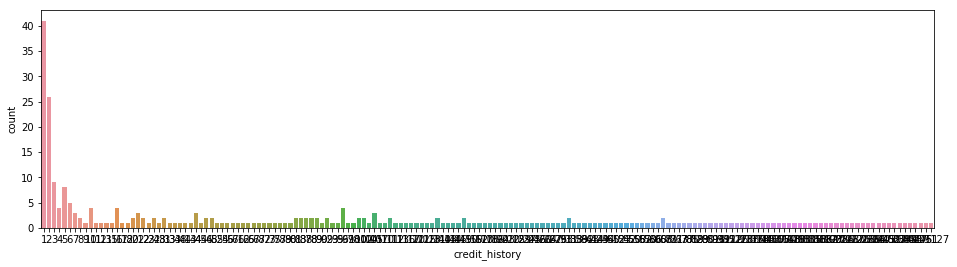

In [191]:
plt.figure(figsize=(16,4))
sns.countplot(train_df.credit_history.value_counts())

In [192]:
bins = pd.IntervalIndex.from_tuples([(-1, 0), (0, 12), (12, 24), 
                                     (24, 36), (36, 60), (60, 120), (120,500)])
train_df['credit_history'] = pd.cut(train_df.credit_history, bins)
test_df['credit_history'] = pd.cut(test_df.credit_history, bins)

bins = pd.IntervalIndex.from_tuples([(-1, 0), (0, 1), (1, 3), (3, 6), (6, 9), (9, 50)])
train_df['credit_hist_year'] = pd.cut(train_df.credit_hist_year, bins)
test_df['credit_hist_year'] = pd.cut(test_df.credit_hist_year, bins)

print(train_df.credit_history.value_counts())
print(train_df.credit_hist_year.value_counts())


(-1, 0]       119127
(0, 12]        32064
(12, 24]       27057
(24, 36]       20462
(36, 60]       18388
(60, 120]      11793
(120, 500]      4263
Name: credit_history, dtype: int64
(-1, 0]    147802
(1, 3]      34511
(0, 1]      26613
(3, 6]      15446
(6, 9]       4423
(9, 50]      4359
Name: credit_hist_year, dtype: int64


In [193]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(train_df['credit_history']) + list(test_df['credit_history']))
print(le.classes_)
train_df['credit_history'] = le.transform(train_df['credit_history'])
test_df['credit_history']  = le.transform(test_df['credit_history'])

le.fit(list(train_df['credit_hist_year']) + list(test_df['credit_hist_year']))
print(le.classes_)
train_df['credit_hist_year'] = le.transform(train_df['credit_hist_year'])
test_df['credit_hist_year']  = le.transform(test_df['credit_hist_year'])


[Interval(-1, 0, closed='right') Interval(0, 12, closed='right')
 Interval(12, 24, closed='right') Interval(24, 36, closed='right')
 Interval(36, 60, closed='right') Interval(60, 120, closed='right')
 Interval(120, 500, closed='right')]
[Interval(-1, 0, closed='right') Interval(0, 1, closed='right')
 Interval(1, 3, closed='right') Interval(3, 6, closed='right')
 Interval(6, 9, closed='right') Interval(9, 50, closed='right')]


# Also try, if category further can be reduced or grouped

In [674]:
train_df[['day_of_disbursal','month_of_disbursal','year_of_disbursal']]

,day_of_disbursal,month_of_disbursal,year_of_disbursal
0,8,3,2018
1,26,9,2018
2,8,1,2018
3,26,10,2018
4,26,9,2018
5,19,9,2018
6,23,9,2018
7,16,9,2018
8,9,5,2018
9,16,9,2018


In [194]:
train_df.drop('year_of_disbursal',axis=1, inplace=True)
test_df.drop('year_of_disbursal',axis=1, inplace=True)


In [195]:
train_df.month_of_disbursal.value_counts()

10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: month_of_disbursal, dtype: int64

In [196]:
train_df.loan_tenure_year.value_counts()

0     168390
1      36650
2      14839
3       6622
4       3033
5       1600
6        810
7        467
8        234
9        150
10       129
11       102
12        57
13        35
14        15
15        10
16         5
17         2
24         1
18         1
22         1
30         1
Name: loan_tenure_year, dtype: int64

In [197]:
train_df.loan_tenure_month.value_counts()

0     127976
6      11085
1      10117
7       9881
4       9757
3       9720
2       9682
5       9519
8       8936
10      8842
9       8842
11      8797
Name: loan_tenure_month, dtype: int64

In [198]:
train_df['loan_tenure'] = train_df['loan_tenure_year']*12+train_df['loan_tenure_month']
test_df['loan_tenure']  = test_df['loan_tenure_year']*12+test_df['loan_tenure_month']

bins = pd.IntervalIndex.from_tuples([(-1, 0), (0, 12), (12, 24), (24, 60), (60,500)])
train_df['loan_tenure'] = pd.cut(train_df.loan_tenure, bins)
test_df['loan_tenure'] = pd.cut(test_df.loan_tenure, bins)

bins = pd.IntervalIndex.from_tuples([(-1, 0), (0, 1), (1, 2), (2, 5), (5, 10), (10, 50)])
train_df['loan_tenure_year'] = pd.cut(train_df.loan_tenure_year, bins)
test_df['loan_tenure_year'] = pd.cut(test_df.loan_tenure_year, bins)

print(train_df.loan_tenure.value_counts())
print(train_df.loan_tenure_year.value_counts())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(train_df['loan_tenure']) + list(test_df['loan_tenure']))
print(le.classes_)
train_df['loan_tenure'] = le.transform(train_df['loan_tenure'])
test_df['loan_tenure']  = le.transform(test_df['loan_tenure'])

le.fit(list(train_df['loan_tenure_year']) + list(test_df['loan_tenure_year']))
print(le.classes_)
train_df['loan_tenure_year'] = le.transform(train_df['loan_tenure_year'])
test_df['loan_tenure_year']  = le.transform(test_df['loan_tenure_year'])


(-1, 0]      119373
(0, 12]       54048
(12, 24]      33582
(24, 60]      22715
(60, 500]      3436
Name: loan_tenure, dtype: int64
(-1, 0]     168390
(0, 1]       36650
(1, 2]       14839
(2, 5]       11255
(5, 10]       1790
(10, 50]       230
Name: loan_tenure_year, dtype: int64
[Interval(-1, 0, closed='right') Interval(0, 12, closed='right')
 Interval(12, 24, closed='right') Interval(24, 60, closed='right')
 Interval(60, 500, closed='right')]
[Interval(-1, 0, closed='right') Interval(0, 1, closed='right')
 Interval(1, 2, closed='right') Interval(2, 5, closed='right')
 Interval(5, 10, closed='right') Interval(10, 50, closed='right')]


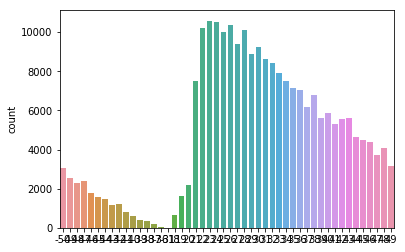

In [199]:
sns.countplot(train_df_save['year_of_disbursal'] - train_df['year_of_birth'])

In [751]:
sorted(test_df['year_of_birth'].unique())

[1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2054,
 2055,
 2056,
 2057,
 2058,
 2059,
 2060,
 2061,
 2062,
 2063,
 2064,
 2065,
 2066,
 2067,
 2068]

In [201]:
train_df.year_of_birth = train_df.year_of_birth.apply(lambda x: int(str(19)+str(x)[-2:]))
test_df.year_of_birth  = test_df.year_of_birth.apply(lambda x: int(str(19)+str(x)[-2:]))

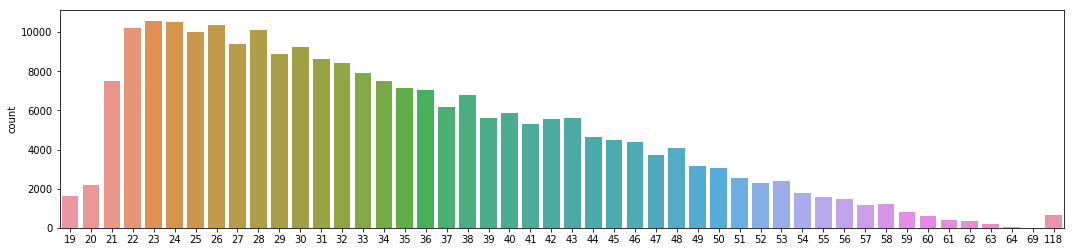

In [202]:
plt.figure(figsize=(18,4))
sns.countplot(train_df_save['year_of_disbursal'] - train_df['year_of_birth'])

In [203]:
train_df['age_till_disbursal'] = train_df_save['year_of_disbursal'] - train_df['year_of_birth']
test_df['age_till_disbursal']  = test_df_save['year_of_disbursal'] - test_df['year_of_birth']

In [758]:
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,loan_tenure_year,loan_tenure_month,day_of_disbursal,month_of_disbursal,Bureau_desc,bureau_score,loan_default,credit_history,loan_tenure,age_till_disbursal
0,420825,50578,58400,89.55,67,22807,45,1441,0,6,...,0,0,8,3,13,0,0,0,0,34
1,537409,47145,65550,73.23,67,22807,45,1502,1,6,...,1,11,26,9,8,598,1,2,2,33
2,417566,53278,61360,89.63,67,22807,45,1497,1,6,...,0,0,8,1,13,0,0,0,0,33
3,624493,57513,66113,88.48,67,22807,45,1501,1,6,...,0,8,26,10,11,305,1,2,1,25
4,539055,52378,60300,88.39,67,22807,45,1495,1,6,...,0,0,26,9,13,0,1,0,0,41


232432 233154


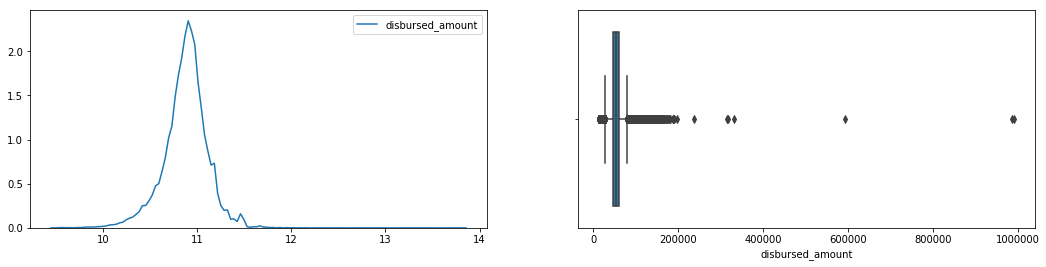

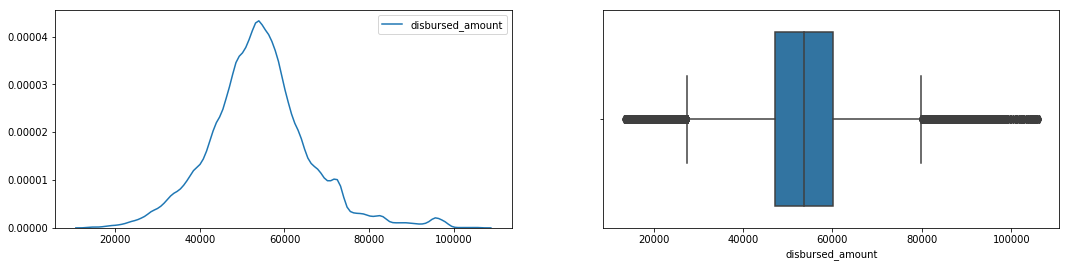

In [214]:
col = 'disbursed_amount'

fig, ax = plt.subplots(1,2,figsize=(18,4))
sns.kdeplot(np.log(train_df[col]), ax=ax[0])
sns.boxplot(train_df[col], ax=ax[1])

fig, ax = plt.subplots(1,2,figsize=(18,4))
tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 4).all(axis=1)]
sns.kdeplot(tp, ax=ax[0])
sns.boxplot(tp, ax=ax[1])

# sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])


In [221]:
train_df[col][train_df[col]>100000].shape, test_df[col][test_df[col]>100000].shape

((835,), (530,))

(835,)
(530,)


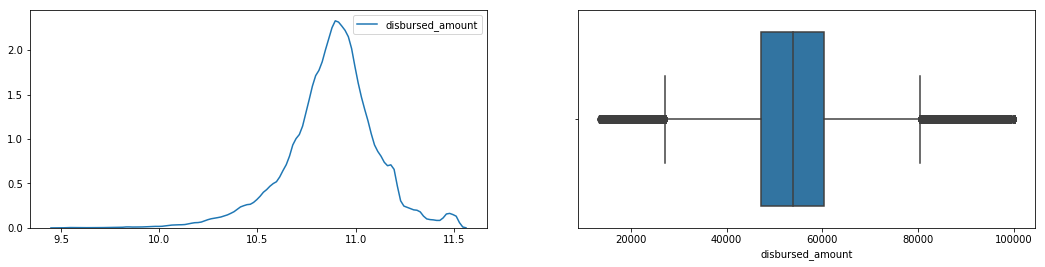

In [223]:
col = 'disbursed_amount'

use_index = train_df[col][train_df[col]>100000].index
train_df.loc[use_index, col] = 100000
print(use_index.shape)

use_index = test_df[col][test_df[col]>100000].index
test_df.loc[use_index, col] = 100000
print(use_index.shape)

fig, ax = plt.subplots(1,2,figsize=(18,4))
sns.kdeplot(np.log(train_df[col]), ax=ax[0])
sns.boxplot(train_df[col], ax=ax[1])


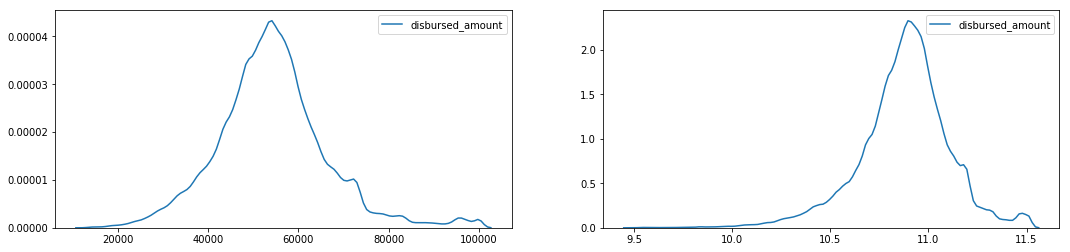

In [225]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
sns.kdeplot(train_df[col], ax=ax[0])
sns.kdeplot(np.log(train_df[col]), ax=ax[1])


230465 233154


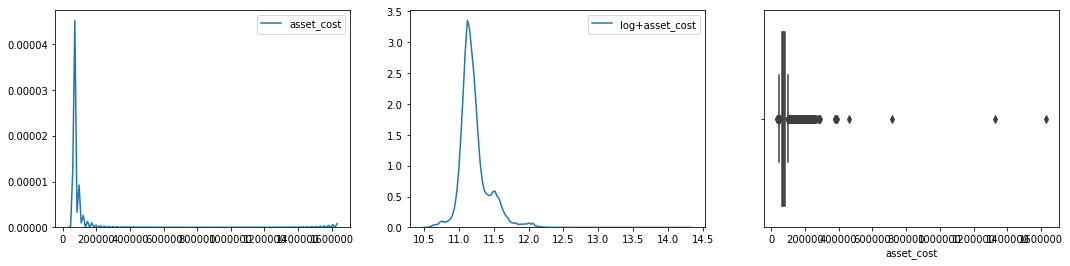

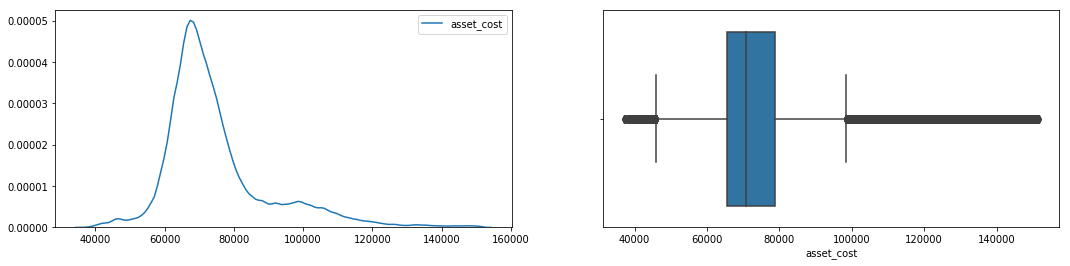

In [229]:
col = 'asset_cost'

fig, ax = plt.subplots(1,3,figsize=(18,4))
sns.kdeplot(train_df[col], ax=ax[0], label=col)
sns.kdeplot(np.log(train_df[col]), ax=ax[1], label='log+'+col)
sns.boxplot(train_df[col], ax=ax[2])

fig, ax = plt.subplots(1,2,figsize=(18,4))
tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 4).all(axis=1)]
sns.kdeplot(tp, ax=ax[0])
sns.boxplot(tp, ax=ax[1])

# sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])


In [235]:
train_df[col][train_df[col]>170000].shape, test_df[col][test_df[col]>170000].shape

((1091,), (630,))

(0,)
(0,)


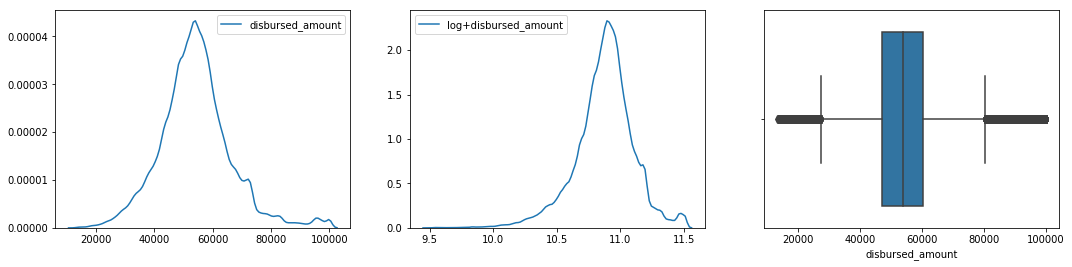

In [236]:
col = 'disbursed_amount'

use_index = train_df[col][train_df[col]>170000].index
train_df.loc[use_index, col] = 170000
print(use_index.shape)

use_index = test_df[col][test_df[col]>170000].index
test_df.loc[use_index, col] = 170000
print(use_index.shape)

fig, ax = plt.subplots(1,3,figsize=(18,4))
sns.kdeplot(train_df[col], ax=ax[0], label=col)
sns.kdeplot(np.log(train_df[col]), ax=ax[1], label='log+'+col)
sns.boxplot(train_df[col], ax=ax[2])


230409 233154


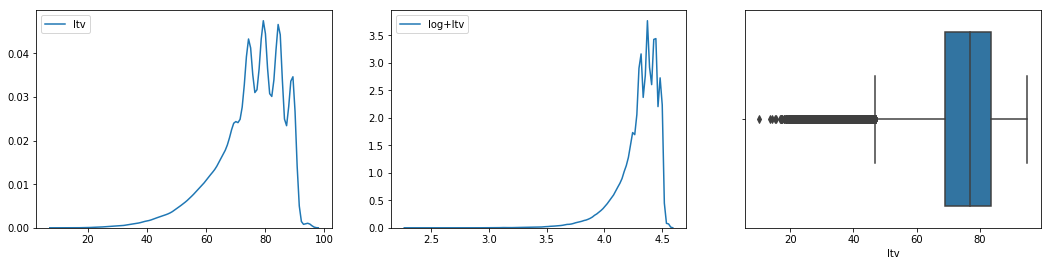

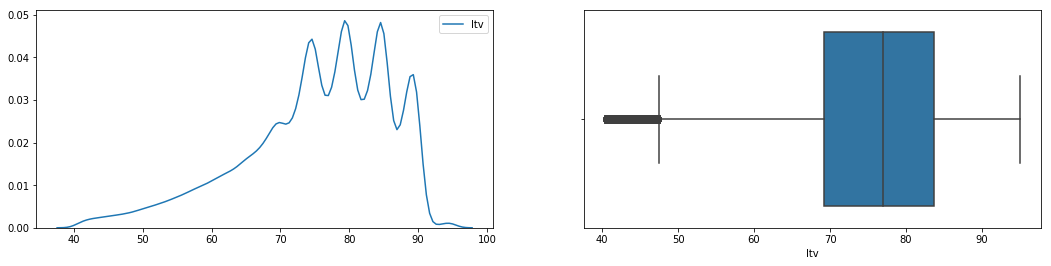

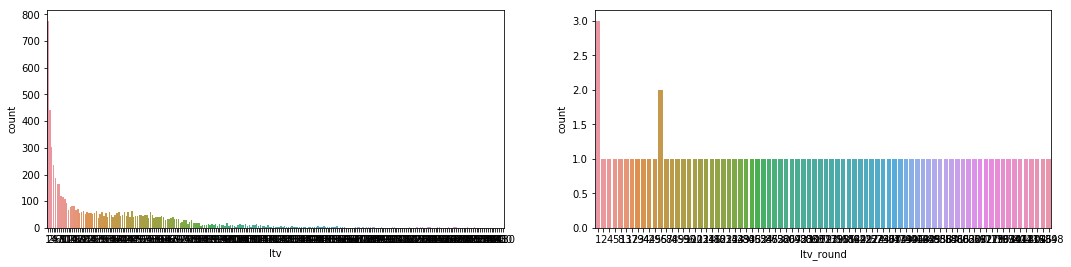

In [244]:
col = 'ltv'

fig, ax = plt.subplots(1,3,figsize=(18,4))
sns.kdeplot(train_df[col], ax=ax[0], label=col)
sns.kdeplot(np.log(train_df[col]), ax=ax[1], label='log+'+col)
sns.boxplot(train_df[col], ax=ax[2])

fig, ax = plt.subplots(1,2,figsize=(18,4))
tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.kdeplot(tp, ax=ax[0])
sns.boxplot(tp, ax=ax[1])

fig, ax = plt.subplots(1,2,figsize=(18,4))
bar = train_df.ltv.value_counts()
sns.countplot(bar, ax=ax[0])
bar = train_df.ltv_round.value_counts()
sns.countplot(bar, ax=ax[1])

# sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])


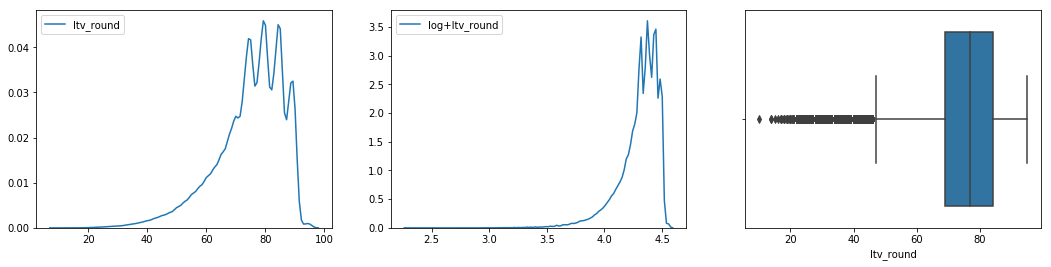

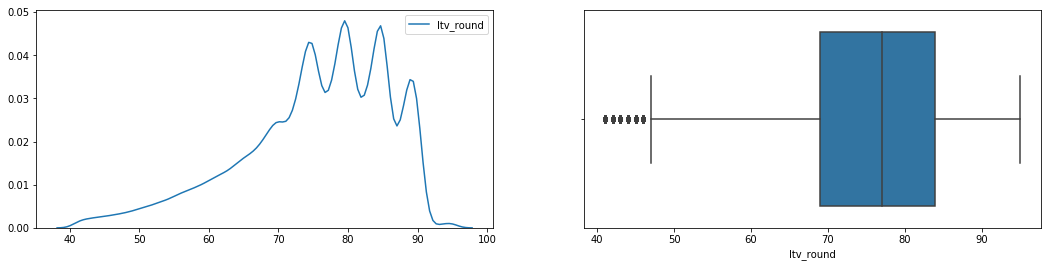

In [262]:
col = 'ltv_round'

fig, ax = plt.subplots(1,3,figsize=(18,4))
sns.kdeplot(train_df[col], ax=ax[0], label=col)
sns.kdeplot(np.log(train_df[col]), ax=ax[1], label='log+'+col)
sns.boxplot(train_df[col], ax=ax[2])

fig, ax = plt.subplots(1,2,figsize=(18,4))
tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.kdeplot(tp, ax=ax[0])
sns.boxplot(tp, ax=ax[1])

In [245]:
train_df.ltv_round.value_counts().sort_index()

10.0        1
14.0        2
15.0        1
16.0        1
17.0        5
18.0        4
19.0        8
20.0       13
21.0       17
22.0       29
23.0       42
24.0       34
25.0       49
26.0       57
27.0       56
28.0       96
29.0       84
30.0      100
31.0       95
32.0      122
33.0      146
34.0      180
35.0      181
36.0      243
37.0      235
38.0      280
39.0      352
40.0      354
41.0      387
42.0      463
        ...  
66.0     3996
67.0     4199
68.0     4885
69.0     5387
70.0     6320
71.0     4986
72.0     5883
73.0     7118
74.0    10480
75.0    12116
76.0     6020
77.0     6627
78.0     7767
79.0    11404
80.0    13639
81.0     5841
82.0     6392
83.0     7130
84.0     9804
85.0    15848
86.0     4006
87.0     4229
88.0     5865
89.0     9741
90.0     9334
91.0       56
92.0       85
93.0      134
94.0      249
95.0      346
Name: ltv_round, Length: 83, dtype: int64

In [263]:
col = 'ltv_round'
new_col = 'ltv_round_cat'

bins_ = [(9.99, 57.0), (57.0, 64.0), (64.0, 69.0), (69.0, 72.0), 
        (72.0, 75.0), (75.0, 77.0), (77.0, 79.0), (79.0, 81.0), 
        (81.0, 84.0), (84.0, 85.0), (85.0, 89.0), (89.0, 95.0)]

bins = pd.IntervalIndex.from_tuples(bins_)
train_df[new_col] = pd.cut(train_df[col], bins)
test_df[new_col]  = pd.cut(test_df[col], bins)
print(train_df[new_col].value_counts())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(train_df[new_col]) + list(test_df[new_col]))
print(le.classes_)
train_df[new_col] = le.transform(train_df[new_col])
test_df[new_col]  = le.transform(test_df[new_col])


(72.0, 75.0]    29714
(85.0, 89.0]    23841
(81.0, 84.0]    23326
(64.0, 69.0]    22207
(9.99, 57.0]    20283
(79.0, 81.0]    19480
(57.0, 64.0]    19244
(77.0, 79.0]    19171
(69.0, 72.0]    17189
(84.0, 85.0]    15848
(75.0, 77.0]    12647
(89.0, 95.0]    10204
Name: ltv_round_cat, dtype: int64
[Interval(9.99, 57.0, closed='right') Interval(57.0, 64.0, closed='right')
 Interval(64.0, 69.0, closed='right') Interval(69.0, 72.0, closed='right')
 Interval(72.0, 75.0, closed='right') Interval(75.0, 77.0, closed='right')
 Interval(77.0, 79.0, closed='right') Interval(79.0, 81.0, closed='right')
 Interval(81.0, 84.0, closed='right') Interval(84.0, 85.0, closed='right')
 Interval(85.0, 89.0, closed='right') Interval(89.0, 95.0, closed='right')]


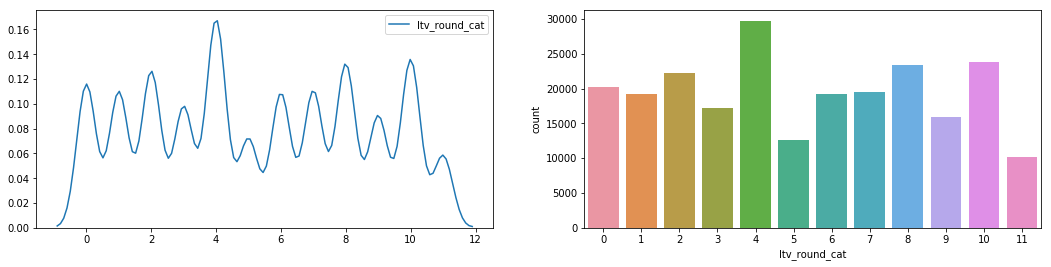

In [267]:
col = 'ltv_round_cat'

fig, ax = plt.subplots(1,2,figsize=(18,4))
sns.kdeplot(train_df[col], ax=ax[0], label=col)
sns.countplot(train_df[col], ax=ax[1])

In [268]:
train_df.drop('ltv_round', axis=1, inplace=True)
test_df.drop('ltv_round', axis=1, inplace=True)


In [277]:
train_df['NO.OF_INQUIRIES'].value_counts()

col = 'NO.OF_INQUIRIES'
new_col = 'no_of_inquiry'

bins_ = [(-1,0),(0,1),(1,3),(3,100)]

bins = pd.IntervalIndex.from_tuples(bins_)
train_df[new_col] = pd.cut(train_df[col], bins)
test_df[new_col]  = pd.cut(test_df[col], bins)
print(train_df[new_col].value_counts())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(train_df[new_col]) + list(test_df[new_col]))
print(le.classes_)
train_df[new_col] = le.transform(train_df[new_col])
test_df[new_col]  = le.transform(test_df[new_col])

train_df.drop(col, axis=1, inplace=True)
test_df.drop(col, axis=1, inplace=True)


(-1, 0]     201961
(0, 1]       22285
(1, 3]        7176
(3, 100]      1732
Name: no_of_inquiry, dtype: int64
[Interval(-1, 0, closed='right') Interval(0, 1, closed='right')
 Interval(1, 3, closed='right') Interval(3, 100, closed='right')]


In [282]:
train_df['SEC.INSTAL.AMT'].value_counts()

0         230937
2100           7
1100           6
5000           6
1065           6
1232           6
2400           5
1565           5
1834           5
50000          5
833            5
1167           5
3334           4
2500           4
2065           4
2250           4
1149           4
1              4
1375           4
1750           4
3000           4
100000         4
1850           4
4500           4
2542           4
1650           4
2150           3
1877           3
231            3
10000          3
           ...  
26846          1
299843         1
55882          1
11210          1
181000         1
81000          1
9419           1
3278           1
17735          1
5581           1
7756           1
1615           1
4046           1
43333          1
19033          1
2769           1
4946           1
4563           1
3025           1
5330           1
7379           1
105699         1
23899          1
3537           1
1616           1
1744           1
6098           1
2256          

In [285]:
col = 'SEC.INSTAL.AMT'

train_df[col][train_df[col]==0].shape

(230937,)

In [286]:
col = 'SEC.INSTAL.AMT'

use_index = train_df[col][train_df[col]!=0].index
train_df.loc[use_index, col] = 1
print(use_index.shape)

use_index = test_df[col][test_df[col]!=0].index
test_df.loc[use_index, col] = 1
print(use_index.shape)


(2217,)
(488,)


In [287]:
train_df[col].value_counts()

0    230937
1      2217
Name: SEC.INSTAL.AMT, dtype: int64

/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


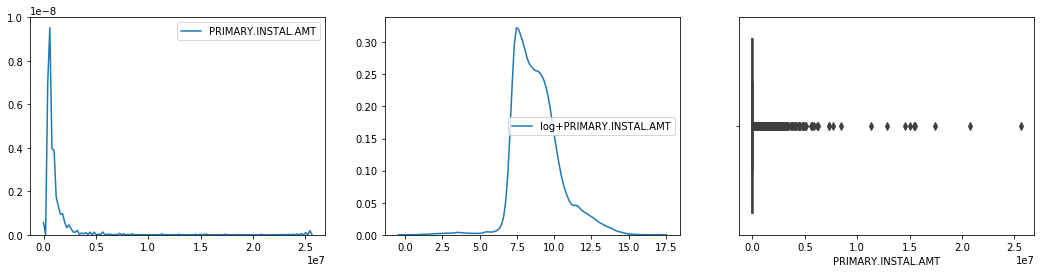

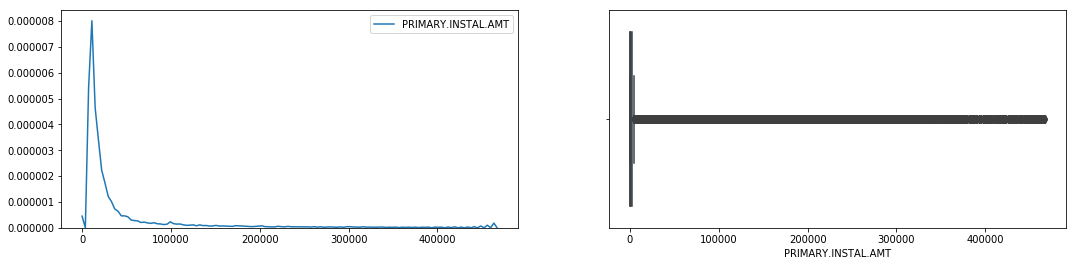

In [289]:
col = 'PRIMARY.INSTAL.AMT'

fig, ax = plt.subplots(1,3,figsize=(18,4))
sns.kdeplot(train_df[col], ax=ax[0], label=col)
sns.kdeplot(np.log(train_df[col]), ax=ax[1], label='log+'+col)
sns.boxplot(train_df[col], ax=ax[2])

fig, ax = plt.subplots(1,2,figsize=(18,4))
tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.kdeplot(tp, ax=ax[0])
sns.boxplot(tp, ax=ax[1])

In [295]:
train_df[col][train_df[col]>600000].shape, test_df[col][test_df[col]>600000].shape

((944,), (359,))

(1181,)
(449,)


/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


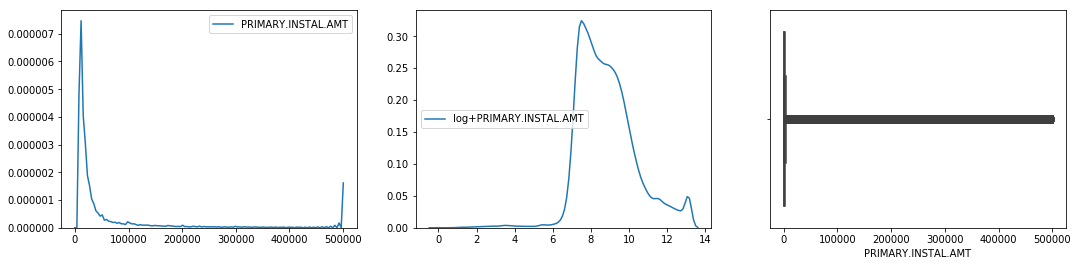

In [296]:
col = 'PRIMARY.INSTAL.AMT'

use_index = train_df[col][train_df[col]>500000].index
train_df.loc[use_index, col] = 500000
print(use_index.shape)

use_index = test_df[col][test_df[col]>500000].index
test_df.loc[use_index, col] = 500000
print(use_index.shape)

fig, ax = plt.subplots(1,3,figsize=(18,4))
sns.kdeplot(train_df[col], ax=ax[0], label=col)
sns.kdeplot(np.log(train_df[col]), ax=ax[1], label='log+'+col)
sns.boxplot(train_df[col], ax=ax[2])


In [300]:
train_df[col][train_df[col]>100000].shape, test_df[col][test_df[col]>100000].shape

((4854,), (1908,))

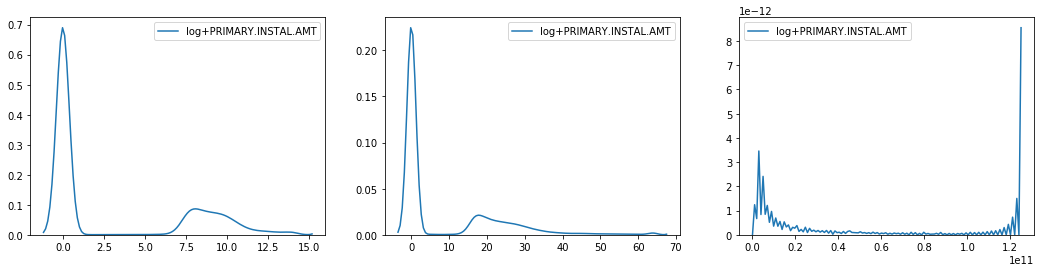

In [312]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
# sns.kdeplot(train_df[col], ax=ax[0], label=col)
sns.kdeplot(boxcox(train_df[col]+1, lmbda=0.01), ax=ax[0], label='log+'+col)
sns.kdeplot(boxcox(train_df[col]+1, lmbda=0.2), ax=ax[1], label='log+'+col)
sns.kdeplot(boxcox(train_df[col]+1, lmbda=2), ax=ax[2], label='log+'+col)


In [319]:
train_df[col][train_df[col]<100000].shape, test_df[col][test_df[col]<100000].shape,\
np.percentile(train_df[col],98)

((228214,), (110451,), 106000.0)

Before:  (233154, 52)
After:  (228214, 52)


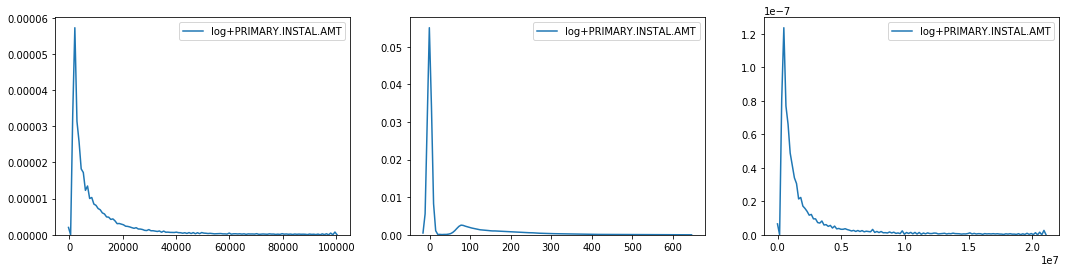

In [320]:
print("Before: ", train_df.shape)
train_df = train_df[train_df[col]<100000]
print("After: ", train_df.shape)

fig, ax = plt.subplots(1,3,figsize=(18,4))
# sns.kdeplot(train_df[col], ax=ax[0], label=col)
sns.kdeplot(boxcox(train_df[col]+1, lmbda=1), ax=ax[0], label='log+'+col)
sns.kdeplot(boxcox(train_df[col]+1, lmbda=0.5), ax=ax[1], label='log+'+col)
sns.kdeplot(boxcox(train_df[col]+1, lmbda=1.5), ax=ax[2], label='log+'+col)


In [325]:
train_df[col][train_df[col]<20000].shape, test_df[col][test_df[col]<20000].shape,\
np.percentile(train_df[col],95)

((218429,), (106178,), 17618.349999999977)

Before:  (228214, 52)
After:  (224607, 52)


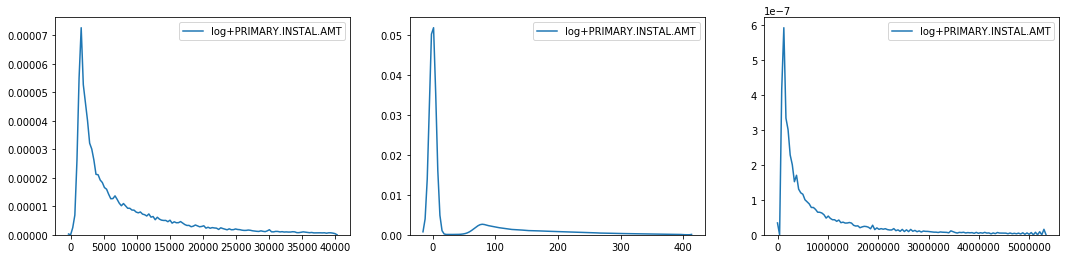

In [326]:
print("Before: ", train_df.shape)
train_df = train_df[train_df[col]<40000]
print("After: ", train_df.shape)

fig, ax = plt.subplots(1,3,figsize=(18,4))
# sns.kdeplot(train_df[col], ax=ax[0], label=col)
sns.kdeplot(boxcox(train_df[col]+1, lmbda=1), ax=ax[0], label='log+'+col)
sns.kdeplot(boxcox(train_df[col]+1, lmbda=0.5), ax=ax[1], label='log+'+col)
sns.kdeplot(boxcox(train_df[col]+1, lmbda=1.5), ax=ax[2], label='log+'+col)


In [329]:
train_df_save2 = train_df.copy()
test_df_save2  = test_df.copy()

train_df.drop(['UniqueID','loan_default'], axis=1, inplace=True)
test_df.drop('UniqueID', axis=1, inplace=True)

train_df.reset_index(drop=True, inplace=True)
target = train_df_save2.loan_default
test_id = test_df_save2.UniqueID

train_df_save.shape, train_df_save1.shape, train_df_save2.shape, train_df.shape

((233154, 47), (233154, 51), (224607, 52), (224607, 50))

In [341]:

from sklearn.model_selection import train_test_split, StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

file_path = 'baseline'
splits = 4
random_seed = 2019
features = train_df.columns
param = {
    'bagging_freq'           : 5,
    'bagging_fraction'       : 0.33,
    'boost_from_average'     : 'false',
    'boost'                  : 'gbdt',
    'feature_fraction'       : 0.3,
    'learning_rate'          : 0.01,
    'max_depth'              : -1,
    'metric'                 : 'auc',
    'min_data_in_leaf'       : 100,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves'             : 30,
    'num_threads'            : 4,
    'tree_learner'           : 'serial',
    'objective'              : 'binary',
    'verbosity'              : 1,
#     'lambda_l1'              : 0.001,
    'lambda_l2'              : 0.05
}   

n_splits = splits
num_round = 10000
folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
oof_lgb = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))

temp = train_df.apply(lambda x: pd.Series.value_counts(x).shape[0])
cat_columns = list(temp[temp<50].index)

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print(trn_idx.shape, val_idx.shape)
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx],
                          feature_name=list(train_df.columns))#,
#                           categorical_feature=cat_columns)

    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx],
                          feature_name=list(train_df.columns))#,
#                           categorical_feature=cat_columns) 

    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], 
                    verbose_eval=50, early_stopping_rounds = 25)
    oof_lgb[val_idx] = clf.predict(train_df.iloc[val_idx][features], 
                               num_iteration=clf.best_iteration)
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits
    
    print( "  auc = ", roc_auc_score(target.iloc[val_idx], oof_lgb[val_idx]) )
    print("="*60)
    
print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_lgb)))

sub_df = pd.DataFrame({"ID_code":test_id})
sub_df["target"] = predictions

sub_df.columns = sub.columns
sub_df.to_csv('submission/lightgbm_target_{}.csv'.format(file_path), index=None)


lgb_imp = pd.DataFrame(data=[clf.feature_name(), list(clf.feature_importance())]).T
lgb_imp.columns = ['feature','imp']
lgb_imp = lgb_imp.sort_values(by='imp', ascending=False)
plt.figure(figsize=(12,15))
plt.barh(lgb_imp.feature, lgb_imp.imp)

(168455,) (56152,)
Fold 0
Training until validation scores don't improve for 25 rounds.
[50]	training's auc: 0.658055	valid_1's auc: 0.649907
[100]	training's auc: 0.660458	valid_1's auc: 0.652178
[150]	training's auc: 0.66301	valid_1's auc: 0.653871
[200]	training's auc: 0.665726	valid_1's auc: 0.655789
[250]	training's auc: 0.66781	valid_1's auc: 0.657361
[300]	training's auc: 0.670516	valid_1's auc: 0.659152
[350]	training's auc: 0.672434	valid_1's auc: 0.660358
[400]	training's auc: 0.674801	valid_1's auc: 0.661921
[450]	training's auc: 0.677013	valid_1's auc: 0.663092
[500]	training's auc: 0.678963	valid_1's auc: 0.664193
[550]	training's auc: 0.680733	valid_1's auc: 0.664862
[600]	training's auc: 0.682542	valid_1's auc: 0.665879
[650]	training's auc: 0.68421	valid_1's auc: 0.6668
[700]	training's auc: 0.685769	valid_1's auc: 0.667288
[750]	training's auc: 0.687284	valid_1's auc: 0.66786
[800]	training's auc: 0.688819	valid_1's auc: 0.668482
[850]	training's auc: 0.690387	valid_1'

NameError: name 'sub' is not defined

In [336]:
train_df_save.to_csv('store_data/train_df_save.csv',index=None)
train_df_save1.to_csv('store_data/train_df_save1.csv',index=None)
train_df_save2.to_csv('store_data/train_df_save2.csv',index=None)

test_df_save.to_csv('store_data/test_df_save.csv',index=None)
test_df_save1.to_csv('store_data/test_df_save1.csv',index=None)
test_df_save2.to_csv('store_data/test_df_save2.csv',index=None)



In [337]:
del train_df_save, train_df_save1, test_df_save, test_df_save1
gc.collect()

2635

In [339]:
gc.collect()
gc.collect()
gc.collect()

0

In [340]:
train_df_save2.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Employment.Type', 'State_ID', 'Employee_code_ID', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'loan_default', 'day_of_birth',
       'month_of_birth', 'year_of_birth', 'credit_hist_year',
       'credit_hist_month', 'loan_tenure_year', 'loan_tenure_month',
       'day_of_disbursal', 'month_of_disbursal', 'Bureau_desc', 'bureau_score',
       'no_of_loans', 'no_of_acc', 'no_of_acc_overdue', 'diff_of_acc',
       'negative_income', 'income_status', 'credit_history'

In [344]:
train_df.apply(lambda x: pd.Series.value_counts(x).shape[0])

disbursed_amount                       23592
asset_cost                             45522
ltv                                     6556
branch_id                                 82
supplier_id                             2946
manufacturer_id                           11
Current_pincode_ID                      6601
Employment.Type                            2
State_ID                                  22
Employee_code_ID                        3268
Aadhar_flag                                2
PAN_flag                                   2
VoterID_flag                               2
Driving_flag                               2
Passport_flag                              2
PRI.CURRENT.BALANCE                    64301
PRI.SANCTIONED.AMOUNT                  40168
PRI.DISBURSED.AMOUNT                   43426
SEC.NO.OF.ACCTS                            2
SEC.ACTIVE.ACCTS                           2
SEC.OVERDUE.ACCTS                          2
SEC.CURRENT.BALANCE                     3042
SEC.SANCTI

In [352]:
train_df = train_df_save2.copy()
test_df  = test_df_save2.copy()


In [393]:
print("Before: ", train_df.shape)

train_df['inst_per_year'] = train_df['disbursed_amount']/1.0*(1+train_df['loan_tenure_year'])
test_df['inst_per_year']  = test_df['disbursed_amount']/1.0*(1+test_df['loan_tenure_year'])

train_df['inst_per_month'] = train_df['disbursed_amount']/1.0*(\
                    1+train_df['credit_hist_year']*12 + train_df['credit_hist_month'])
test_df['inst_per_month']  = test_df['disbursed_amount']/1.0*(\
                    1+test_df['credit_hist_year']*12 + test_df['credit_hist_month'])

train_df['inst_per_credit_year'] = (train_df['disbursed_amount']/(1+train_df['credit_hist_year']))
test_df['inst_per_credit_year']  = (test_df['disbursed_amount']/(1+test_df['credit_hist_year']))

train_df['inst_per_credit_month'] = train_df['disbursed_amount']/1.0*(\
                    1+train_df['credit_hist_year']*12 + train_df['credit_hist_month'])
test_df['inst_per_credit_month']  = test_df['disbursed_amount']/1.0*(\
                    1+test_df['credit_hist_year']*12 + test_df['credit_hist_month'])

train_df['loan_tenure/credit(in month)'] = (
    (train_df['loan_tenure_year']*12 +train_df['loan_tenure_month'])/(
    1+train_df['credit_hist_year']*12 + train_df['credit_hist_month'])).fillna(0)
test_df['loan_tenure/credit(in month)'] = (
    (test_df['loan_tenure_year']*12 + test_df['loan_tenure_month'])/(
    1+test_df['credit_hist_year']*12 + test_df['credit_hist_month'])).fillna(0)


train_df['assest-disbursed'] = train_df['asset_cost'] - train_df['disbursed_amount']
test_df['assest-disbursed'] = test_df['asset_cost'] - test_df['disbursed_amount']

print("After: ", train_df.shape)


Before:  (224607, 52)
After:  (224607, 58)


In [394]:
train_df_save2 = train_df.copy()
test_df_save2  = test_df.copy()

train_df.drop(['UniqueID','loan_default'], axis=1, inplace=True)
test_df.drop('UniqueID', axis=1, inplace=True)

train_df.reset_index(drop=True, inplace=True)
target = train_df_save2.loan_default
test_id = test_df_save2.UniqueID

train_df_save.shape, train_df_save1.shape, train_df_save2.shape, train_df.shape

NameError: name 'train_df_save' is not defined

(168455,) (56152,)
Fold 0
Training until validation scores don't improve for 25 rounds.
[50]	training's auc: 0.653119	valid_1's auc: 0.64377
[100]	training's auc: 0.656524	valid_1's auc: 0.647822
[150]	training's auc: 0.65992	valid_1's auc: 0.650291
[200]	training's auc: 0.663109	valid_1's auc: 0.653117
[250]	training's auc: 0.665918	valid_1's auc: 0.655329
[300]	training's auc: 0.669244	valid_1's auc: 0.657633
[350]	training's auc: 0.671601	valid_1's auc: 0.659124
[400]	training's auc: 0.674506	valid_1's auc: 0.661122
[450]	training's auc: 0.676944	valid_1's auc: 0.662334
[500]	training's auc: 0.679117	valid_1's auc: 0.663302
[550]	training's auc: 0.681125	valid_1's auc: 0.664202
[600]	training's auc: 0.682997	valid_1's auc: 0.665139
[650]	training's auc: 0.684779	valid_1's auc: 0.665947
[700]	training's auc: 0.686553	valid_1's auc: 0.666592
[750]	training's auc: 0.688141	valid_1's auc: 0.667154
[800]	training's auc: 0.689791	valid_1's auc: 0.667681
[850]	training's auc: 0.691359	vali

<BarContainer object of 56 artists>

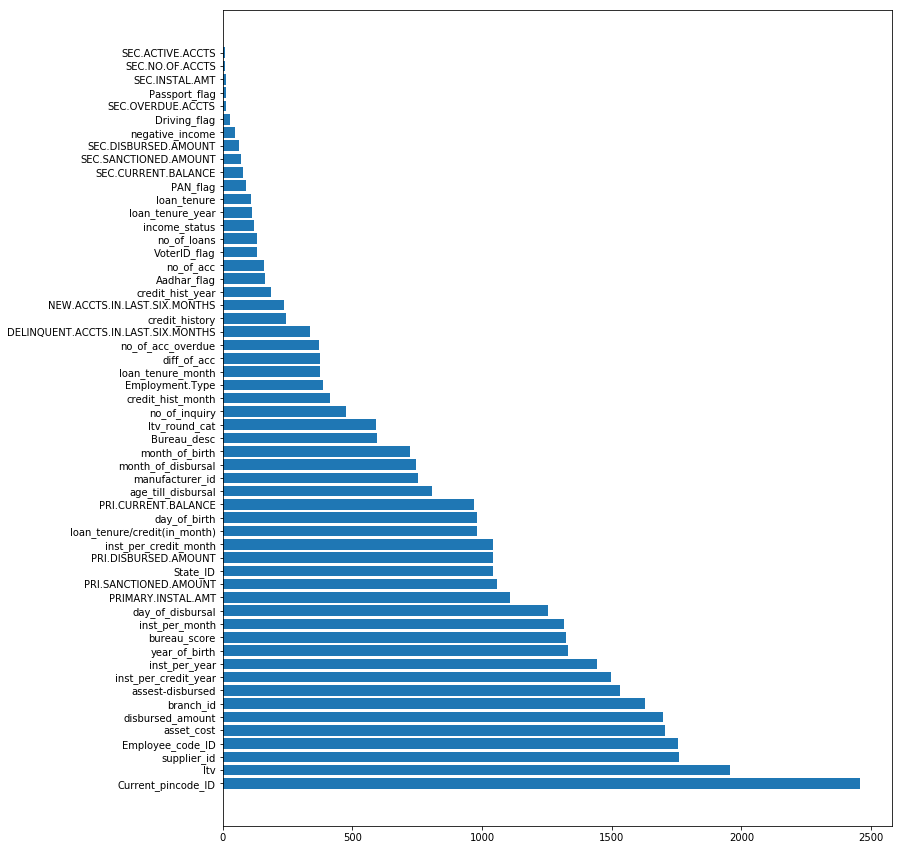

In [401]:

from sklearn.model_selection import train_test_split, StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

file_path = 'baseline1'
splits = 4
random_seed = 2019
features = train_df.columns
param = {
    'bagging_freq'           : 5,
    'bagging_fraction'       : 0.33,
    'boost_from_average'     : 'false',
    'boost'                  : 'gbdt',
    'feature_fraction'       : 0.3,
    'learning_rate'          : 0.01,
    'max_depth'              : -1,
    'metric'                 : 'auc',
    'min_data_in_leaf'       : 100,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves'             : 30,
    'num_threads'            : 4,
    'tree_learner'           : 'serial',
    'objective'              : 'binary',
    'verbosity'              : 1,
#     'lambda_l1'              : 0.001,
    'lambda_l2'              : 0.05
}   

n_splits = splits
num_round = 10000
folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
oof_lgb = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))

temp = train_df.apply(lambda x: pd.Series.value_counts(x).shape[0])
cat_columns = list(temp[temp<50].index)

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print(trn_idx.shape, val_idx.shape)
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx],
                          feature_name=list(train_df.columns))#,
#                           categorical_feature=cat_columns)

    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx],
                          feature_name=list(train_df.columns))#,
#                           categorical_feature=cat_columns) 

    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], 
                    verbose_eval=200, early_stopping_rounds = 25)
    oof_lgb[val_idx] = clf.predict(train_df.iloc[val_idx][features], 
                               num_iteration=clf.best_iteration)
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits
    
    print( "  auc = ", roc_auc_score(target.iloc[val_idx], oof_lgb[val_idx]) )
    print("="*60)
    
print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_lgb)))

sub_df = pd.DataFrame({"ID_code":test_id})
sub_df["target"] = predictions

sub_df.columns = sub.columns
sub_df.to_csv('submission/lightgbm_target_{}.csv'.format(file_path), index=None)


lgb_imp = pd.DataFrame(data=[clf.feature_name(), list(clf.feature_importance())]).T
lgb_imp.columns = ['feature','imp']
lgb_imp = lgb_imp.sort_values(by='imp', ascending=False)
plt.figure(figsize=(12,15))
plt.barh(lgb_imp.feature, lgb_imp.imp)

In [402]:
!ls submission/

check.zip  lightgbm_target_baseline1.csv  lightgbm_target_baseline.csv


In [403]:
!zip submission/lightgbm_target_baseline1.zip submission/lightgbm_target_baseline1.csv

  adding: submission/lightgbm_target_baseline1.csv (deflated 54%)


In [404]:
del train_df, test_df
train_df = train_df_save2.copy()
test_df  = test_df_save2.copy()


In [440]:
del branch_gps, state_gps, manufac_gps
gc.collect()

6463

In [469]:
print("check status: ", len(set(train_df['branch_id']).intersection(
    set(test_df['branch_id']))), \
    len(set(test_df['branch_id'])), len(set(train_df['branch_id'])))

def get_mean(data):
    return data[(np.abs(stats.zscore(data)) < 3).all(axis=1)].mean()

branch_gp = train_df.groupby(['branch_id'])['asset_cost','disbursed_amount'].apply(get_mean)
branch_gp = pd.DataFrame(data=[list(branch_gp.index), 
                               list(branch_gp.values[:,0]), 
                               list(branch_gp.values[:,1])]).T
branch_gp.columns = ['branch_id','branch_asset_amt_mean','branch_disbursed_amt_mean']
branch_gp.fillna(branch_gp.median(), inplace=True)

print("Before: ", train_df.shape)
train_df = pd.merge(train_df, branch_gp, on='branch_id', how='left')
print("After", train_df.shape)

branch_gp = test_df.groupby(['branch_id'])['asset_cost','disbursed_amount'].apply(get_mean)
branch_gp = pd.DataFrame(data=[list(branch_gp.index), 
                               list(branch_gp.values[:,0]), 
                               list(branch_gp.values[:,1])]).T
branch_gp.columns = ['branch_id','branch_asset_amt_mean','branch_disbursed_amt_mean']
branch_gp.fillna(branch_gp.median(), inplace=True)

print("Before: ", test_df.shape)
test_df = pd.merge(test_df, branch_gp, on='branch_id', how='left')
print("After", test_df.shape)

check status:  82 82 82
Before:  (224607, 58)
After (224607, 60)
Before:  (112392, 57)
After (112392, 59)


In [483]:
print("check status: ", len(set(train_df['supplier_id']).intersection(
    set(test_df['supplier_id']))), \
    len(set(test_df['supplier_id'])), len(set(train_df['supplier_id'])))

def get_mean(data):
    return data[(np.abs(stats.zscore(data)) < 3).all(axis=1)].mean()

branch_gp = train_df.groupby(['supplier_id'])['asset_cost','disbursed_amount'].apply(get_mean)
branch_gp = pd.DataFrame(data=[list(branch_gp.index), 
                               list(branch_gp.values[:,0]), 
                               list(branch_gp.values[:,1])]).T
branch_gp.columns = ['supplier_id','supplier_asset_amt_mean','supplier_disbursed_amt_mean']
branch_gp.fillna(branch_gp.median(), inplace=True)

print("Before: ", train_df.shape)
train_df = pd.merge(train_df, branch_gp, on='supplier_id', how='left')
print("After", train_df.shape)

branch_gp = test_df.groupby(['supplier_id'])['asset_cost','disbursed_amount'].apply(get_mean)
branch_gp = pd.DataFrame(data=[list(branch_gp.index), 
                               list(branch_gp.values[:,0]), 
                               list(branch_gp.values[:,1])]).T
branch_gp.columns = ['supplier_id','supplier_asset_amt_mean','supplier_disbursed_amt_mean']
branch_gp.fillna(branch_gp.median(), inplace=True)

print("Before: ", test_df.shape)
test_df = pd.merge(test_df, branch_gp, on='supplier_id', how='left')
print("After", test_df.shape)

check status:  2725 2863 2946


/home/ankish/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2281: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


Before:  (224607, 60)
After (224607, 62)
Before:  (112392, 59)
After (112392, 61)


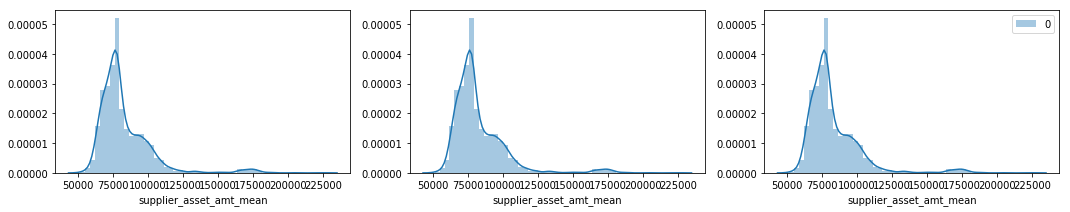

In [484]:
fig, ax = plt.subplots(1,3,figsize=(18,3))
sns.distplot(branch_gp['supplier_asset_amt_mean'].fillna(
    branch_gp['supplier_asset_amt_mean'].mean()), ax=ax[0], label='mean')
sns.distplot(branch_gp['supplier_asset_amt_mean'].fillna(
    branch_gp['supplier_asset_amt_mean'].median()), ax=ax[1], label='median')
sns.distplot(branch_gp['supplier_asset_amt_mean'].fillna(0), ax=ax[2], label='0')
plt.legend()

In [488]:
col = 'manufacturer_id'
half_col = 'manufacturer'

print("check status: ", len(set(train_df[col]).intersection(set(test_df[col]))), \
    len(set(test_df[col])), len(set(train_df[col])))

def get_mean(data):
    return data[(np.abs(stats.zscore(data)) < 3).all(axis=1)].mean()

branch_gp = train_df.groupby([col])['asset_cost','disbursed_amount'].apply(get_mean)
branch_gp = pd.DataFrame(data=[list(branch_gp.index), 
                               list(branch_gp.values[:,0]), 
                               list(branch_gp.values[:,1])]).T
branch_gp.columns = [col,half_col+'_asset_amt_mean',half_col+'_disbursed_amt_mean']
branch_gp.fillna(branch_gp.median(), inplace=True)

print("Before: ", train_df.shape)
train_df = pd.merge(train_df, branch_gp, on=col, how='left')
print("After", train_df.shape)

branch_gp = test_df.groupby([col])['asset_cost','disbursed_amount'].apply(get_mean)
branch_gp = pd.DataFrame(data=[list(branch_gp.index), 
                               list(branch_gp.values[:,0]), 
                               list(branch_gp.values[:,1])]).T
branch_gp.columns = [col,half_col+'_asset_amt_mean',half_col+'_disbursed_amt_mean']
branch_gp.fillna(branch_gp.median(), inplace=True)

print("Before: ", test_df.shape)
test_df = pd.merge(test_df, branch_gp, on=col, how='left')
print("After", test_df.shape)

check status:  10 11 11
Before:  (224607, 62)


/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


After (224607, 64)
Before:  (112392, 61)
After (112392, 63)


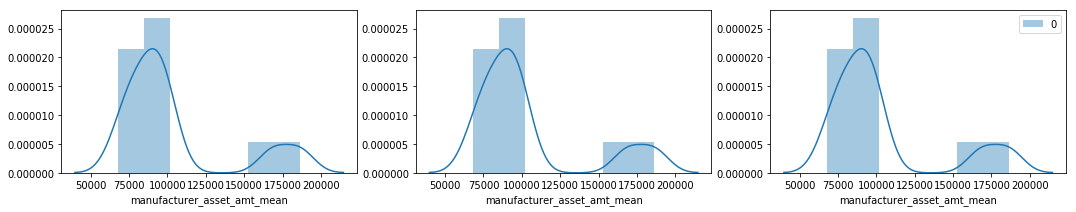

In [489]:
fig, ax = plt.subplots(1,3,figsize=(18,3))
sns.distplot(branch_gp[half_col+'_asset_amt_mean'].fillna(
    branch_gp[half_col+'_asset_amt_mean'].mean()), ax=ax[0], label='mean')
sns.distplot(branch_gp[half_col+'_asset_amt_mean'].fillna(
    branch_gp[half_col+'_asset_amt_mean'].median()), ax=ax[1], label='median')
sns.distplot(branch_gp[half_col+'_asset_amt_mean'].fillna(0), ax=ax[2], label='0')
plt.legend()

In [491]:
col = 'State_ID'
half_col = 'State'

print("check status: ", len(set(train_df[col]).intersection(set(test_df[col]))), \
    len(set(test_df[col])), len(set(train_df[col])))

def get_mean(data):
    return data[(np.abs(stats.zscore(data)) < 3).all(axis=1)].mean()

branch_gp = train_df.groupby([col])['asset_cost','disbursed_amount'].apply(get_mean)
branch_gp = pd.DataFrame(data=[list(branch_gp.index), 
                               list(branch_gp.values[:,0]), 
                               list(branch_gp.values[:,1])]).T
branch_gp.columns = [col,half_col+'_asset_amt_mean',half_col+'_disbursed_amt_mean']
branch_gp.fillna(branch_gp.median(), inplace=True)

print("Before: ", train_df.shape)
train_df = pd.merge(train_df, branch_gp, on=col, how='left')
print("After", train_df.shape)

branch_gp = test_df.groupby([col])['asset_cost','disbursed_amount'].apply(get_mean)
branch_gp = pd.DataFrame(data=[list(branch_gp.index), 
                               list(branch_gp.values[:,0]), 
                               list(branch_gp.values[:,1])]).T
branch_gp.columns = [col,half_col+'_asset_amt_mean',half_col+'_disbursed_amt_mean']
branch_gp.fillna(branch_gp.median(), inplace=True)

print("Before: ", test_df.shape)
test_df = pd.merge(test_df, branch_gp, on=col, how='left')
print("After", test_df.shape)

check status:  22 22 22
Before:  (224607, 64)
After (224607, 66)
Before:  (112392, 63)
After (112392, 65)


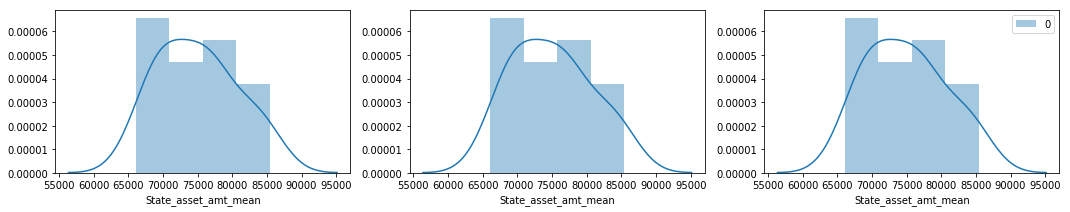

In [492]:
fig, ax = plt.subplots(1,3,figsize=(18,3))
sns.distplot(branch_gp[half_col+'_asset_amt_mean'].fillna(
    branch_gp[half_col+'_asset_amt_mean'].mean()), ax=ax[0], label='mean')
sns.distplot(branch_gp[half_col+'_asset_amt_mean'].fillna(
    branch_gp[half_col+'_asset_amt_mean'].median()), ax=ax[1], label='median')
sns.distplot(branch_gp[half_col+'_asset_amt_mean'].fillna(0), ax=ax[2], label='0')
plt.legend()

check status:  5766 6202 6601


In [494]:
col = 'Employee_code_ID'
half_col = 'Employee'

print("check status: ", len(set(train_df[col]).intersection(set(test_df[col]))), \
    len(set(test_df[col])), len(set(train_df[col])))

def get_mean(data):
    return data[(np.abs(stats.zscore(data)) < 3).all(axis=1)].mean()

branch_gp = train_df.groupby([col])['asset_cost','disbursed_amount'].apply(get_mean)
branch_gp = pd.DataFrame(data=[list(branch_gp.index), 
                               list(branch_gp.values[:,0]), 
                               list(branch_gp.values[:,1])]).T
branch_gp.columns = [col,half_col+'_asset_amt_mean',half_col+'_disbursed_amt_mean']
branch_gp.fillna(branch_gp.median(), inplace=True)

print("Before: ", train_df.shape)
train_df = pd.merge(train_df, branch_gp, on=col, how='left')
print("After", train_df.shape)

branch_gp = test_df.groupby([col])['asset_cost','disbursed_amount'].apply(get_mean)
branch_gp = pd.DataFrame(data=[list(branch_gp.index), 
                               list(branch_gp.values[:,0]), 
                               list(branch_gp.values[:,1])]).T
branch_gp.columns = [col,half_col+'_asset_amt_mean',half_col+'_disbursed_amt_mean']
branch_gp.fillna(branch_gp.median(), inplace=True)

print("Before: ", test_df.shape)
test_df = pd.merge(test_df, branch_gp, on=col, how='left')
print("After", test_df.shape)

check status:  3014 3143 3268


/home/ankish/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2281: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


Before:  (224607, 66)
After (224607, 68)
Before:  (112392, 65)
After (112392, 67)


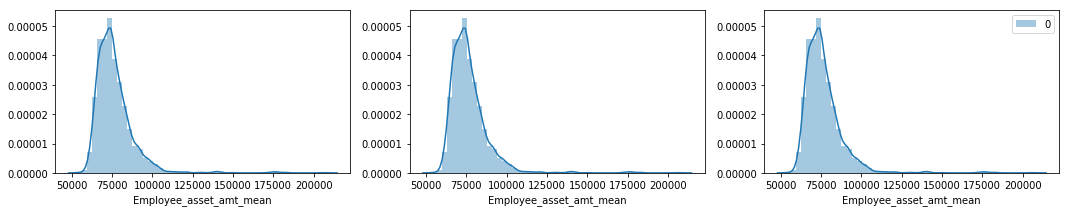

In [495]:
fig, ax = plt.subplots(1,3,figsize=(18,3))
sns.distplot(branch_gp[half_col+'_asset_amt_mean'].fillna(
    branch_gp[half_col+'_asset_amt_mean'].mean()), ax=ax[0], label='mean')
sns.distplot(branch_gp[half_col+'_asset_amt_mean'].fillna(
    branch_gp[half_col+'_asset_amt_mean'].median()), ax=ax[1], label='median')
sns.distplot(branch_gp[half_col+'_asset_amt_mean'].fillna(0), ax=ax[2], label='0')
plt.legend()

In [497]:
col = 'Current_pincode_ID'
half_col = 'Pincode'

print("check status: ", len(set(train_df[col]).intersection(set(test_df[col]))), \
    len(set(test_df[col])), len(set(train_df[col])))

def get_mean(data):
    return data[(np.abs(stats.zscore(data)) < 3).all(axis=1)].mean()

branch_gp = train_df.groupby([col])['asset_cost','disbursed_amount'].apply(get_mean)
branch_gp = pd.DataFrame(data=[list(branch_gp.index), 
                               list(branch_gp.values[:,0]), 
                               list(branch_gp.values[:,1])]).T
branch_gp.columns = [col,half_col+'_asset_amt_mean',half_col+'_disbursed_amt_mean']
branch_gp.fillna(branch_gp.median(), inplace=True)

print("Before: ", train_df.shape)
train_df = pd.merge(train_df, branch_gp, on=col, how='left')
print("After", train_df.shape)

branch_gp = test_df.groupby([col])['asset_cost','disbursed_amount'].apply(get_mean)
branch_gp = pd.DataFrame(data=[list(branch_gp.index), 
                               list(branch_gp.values[:,0]), 
                               list(branch_gp.values[:,1])]).T
branch_gp.columns = [col,half_col+'_asset_amt_mean',half_col+'_disbursed_amt_mean']
branch_gp.fillna(branch_gp.median(), inplace=True)

print("Before: ", test_df.shape)
test_df = pd.merge(test_df, branch_gp, on=col, how='left')
print("After", test_df.shape)

check status:  5766 6202 6601


/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


Before:  (224607, 68)
After (224607, 70)
Before:  (112392, 67)
After (112392, 69)


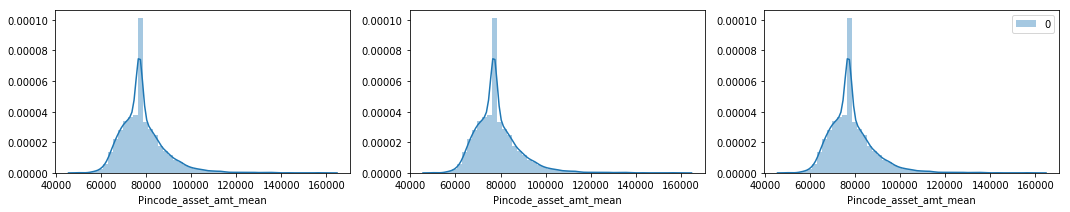

In [498]:
fig, ax = plt.subplots(1,3,figsize=(18,3))
sns.distplot(branch_gp[half_col+'_asset_amt_mean'].fillna(
    branch_gp[half_col+'_asset_amt_mean'].mean()), ax=ax[0], label='mean')
sns.distplot(branch_gp[half_col+'_asset_amt_mean'].fillna(
    branch_gp[half_col+'_asset_amt_mean'].median()), ax=ax[1], label='median')
sns.distplot(branch_gp[half_col+'_asset_amt_mean'].fillna(0), ax=ax[2], label='0')
plt.legend()

In [499]:
train_df_save2 = train_df.copy()
test_df_save2  = test_df.copy()

train_df.drop(['UniqueID','loan_default'], axis=1, inplace=True)
test_df.drop('UniqueID', axis=1, inplace=True)

train_df.reset_index(drop=True, inplace=True)
target = train_df_save2.loan_default
test_id = test_df_save2.UniqueID

train_df_save2.shape, train_df.shape

((224607, 70), (224607, 68))

(168455,) (56152,)
Fold 0
Training until validation scores don't improve for 25 rounds.
[200]	training's auc: 0.664969	valid_1's auc: 0.654364
[400]	training's auc: 0.678074	valid_1's auc: 0.663229
[600]	training's auc: 0.687379	valid_1's auc: 0.667844
[800]	training's auc: 0.694686	valid_1's auc: 0.670587
[1000]	training's auc: 0.701048	valid_1's auc: 0.672158
[1200]	training's auc: 0.706892	valid_1's auc: 0.673335
[1400]	training's auc: 0.712329	valid_1's auc: 0.674078
[1600]	training's auc: 0.717554	valid_1's auc: 0.674611
Early stopping, best iteration is:
[1710]	training's auc: 0.720367	valid_1's auc: 0.674995
  auc =  0.6749945388719458
(168455,) (56152,)
Fold 1
Training until validation scores don't improve for 25 rounds.
[200]	training's auc: 0.664653	valid_1's auc: 0.656581
[400]	training's auc: 0.67772	valid_1's auc: 0.664912
[600]	training's auc: 0.687251	valid_1's auc: 0.66943
[800]	training's auc: 0.694569	valid_1's auc: 0.671929
[1000]	training's auc: 0.701071	valid_1's a

<BarContainer object of 68 artists>

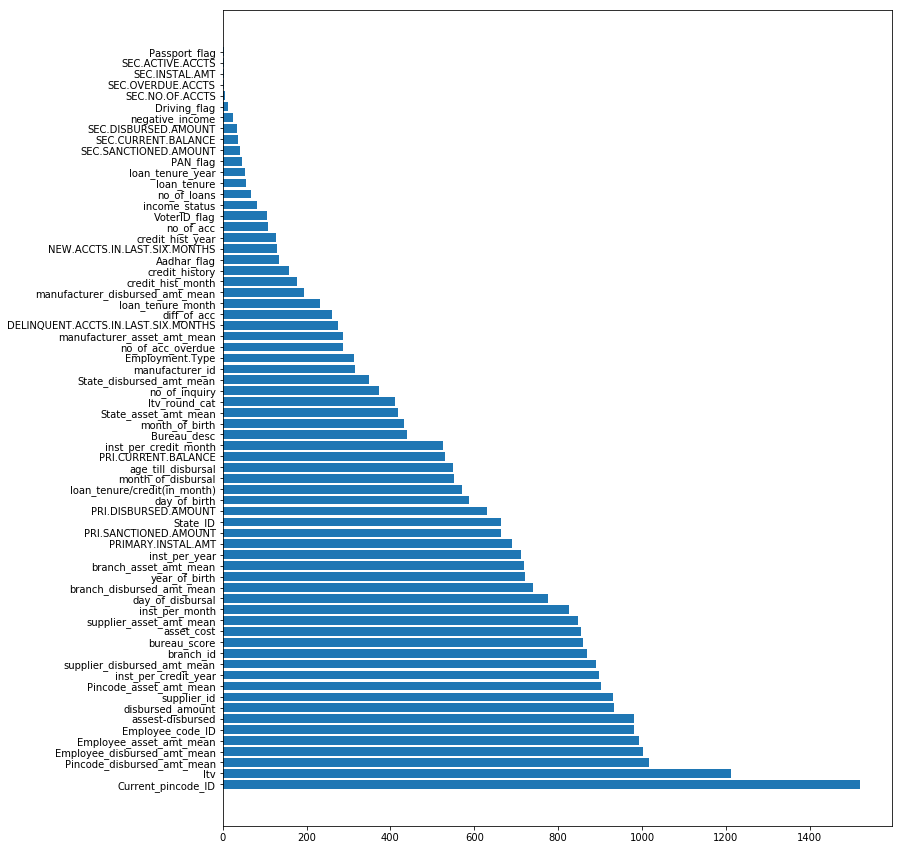

In [500]:

from sklearn.model_selection import train_test_split, StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

file_path = 'baseline2'
splits = 4
random_seed = 2019
features = train_df.columns
param = {
    'bagging_freq'           : 5,
    'bagging_fraction'       : 0.33,
    'boost_from_average'     : 'false',
    'boost'                  : 'gbdt',
    'feature_fraction'       : 0.3,
    'learning_rate'          : 0.01,
    'max_depth'              : -1,
    'metric'                 : 'auc',
    'min_data_in_leaf'       : 100,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves'             : 30,
    'num_threads'            : 4,
    'tree_learner'           : 'serial',
    'objective'              : 'binary',
    'verbosity'              : 1,
#     'lambda_l1'              : 0.001,
    'lambda_l2'              : 0.05
}   

n_splits = splits
num_round = 10000
folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
oof_lgb = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))

temp = train_df.apply(lambda x: pd.Series.value_counts(x).shape[0])
cat_columns = list(temp[temp<50].index)

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print(trn_idx.shape, val_idx.shape)
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx],
                          feature_name=list(train_df.columns))#,
#                           categorical_feature=cat_columns)

    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx],
                          feature_name=list(train_df.columns))#,
#                           categorical_feature=cat_columns) 

    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], 
                    verbose_eval=200, early_stopping_rounds = 25)
    oof_lgb[val_idx] = clf.predict(train_df.iloc[val_idx][features], 
                               num_iteration=clf.best_iteration)
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits
    
    print( "  auc = ", roc_auc_score(target.iloc[val_idx], oof_lgb[val_idx]) )
    print("="*60)
    
print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_lgb)))

sub_df = pd.DataFrame({"ID_code":test_id})
sub_df["target"] = predictions

sub_df.columns = sub.columns
sub_df.to_csv('submission/lightgbm_target_{}.csv'.format(file_path), index=None)


lgb_imp = pd.DataFrame(data=[clf.feature_name(), list(clf.feature_importance())]).T
lgb_imp.columns = ['feature','imp']
lgb_imp = lgb_imp.sort_values(by='imp', ascending=False)
plt.figure(figsize=(12,15))
plt.barh(lgb_imp.feature, lgb_imp.imp)

In [501]:
!zip submission/lightgbm_target_baseline2.zip submission/lightgbm_target_baseline2.csv

  adding: submission/lightgbm_target_baseline2.csv (deflated 54%)


In [502]:
train_df.drop(['Current_pincode_ID','Employee_code_ID','supplier_id'], axis=1, inplace=True)
test_df.drop(['Current_pincode_ID','Employee_code_ID','supplier_id'], axis=1, inplace=True)


(168455,) (56152,)
Fold 0
Training until validation scores don't improve for 25 rounds.
[200]	training's auc: 0.662914	valid_1's auc: 0.652765
[400]	training's auc: 0.676361	valid_1's auc: 0.661829
[600]	training's auc: 0.685285	valid_1's auc: 0.666189
[800]	training's auc: 0.69236	valid_1's auc: 0.668699
[1000]	training's auc: 0.698597	valid_1's auc: 0.670331
[1200]	training's auc: 0.704315	valid_1's auc: 0.671337
[1400]	training's auc: 0.709611	valid_1's auc: 0.672051
[1600]	training's auc: 0.714717	valid_1's auc: 0.672719
Early stopping, best iteration is:
[1642]	training's auc: 0.715787	valid_1's auc: 0.672846
  auc =  0.6728462858449251
(168455,) (56152,)
Fold 1
Training until validation scores don't improve for 25 rounds.
[200]	training's auc: 0.662134	valid_1's auc: 0.654462
[400]	training's auc: 0.675403	valid_1's auc: 0.663477
[600]	training's auc: 0.684809	valid_1's auc: 0.668085
[800]	training's auc: 0.692212	valid_1's auc: 0.670704
[1000]	training's auc: 0.698546	valid_1's 

<BarContainer object of 65 artists>

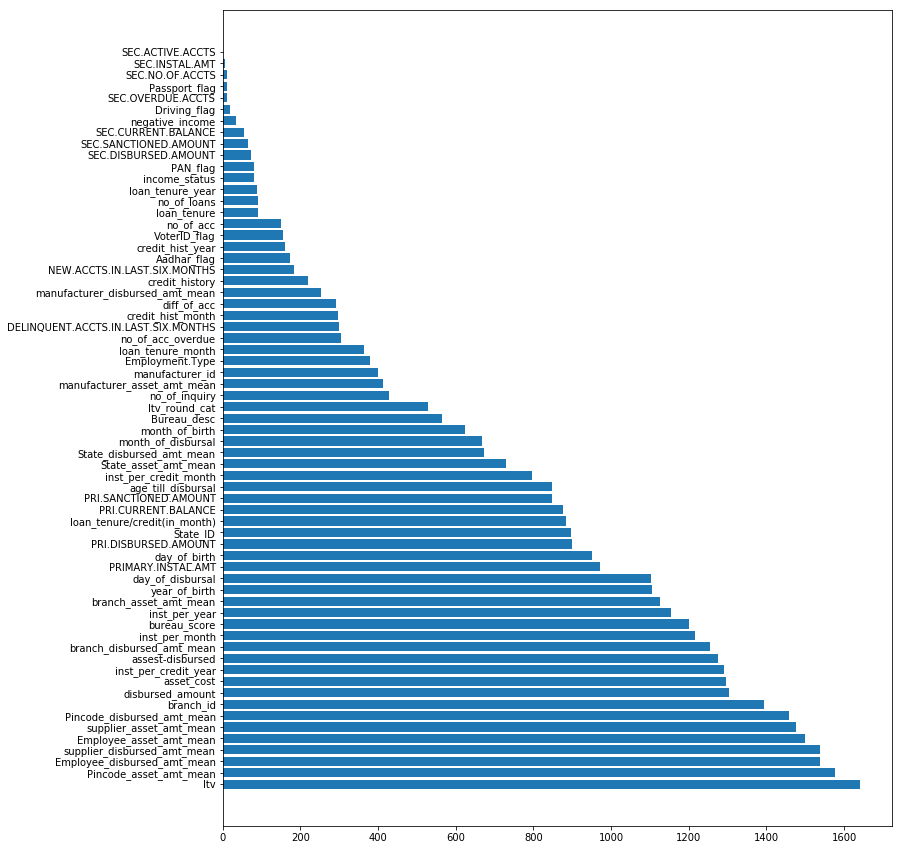

In [503]:

from sklearn.model_selection import train_test_split, StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

file_path = 'baseline3'
splits = 4
random_seed = 2019
features = train_df.columns
param = {
    'bagging_freq'           : 5,
    'bagging_fraction'       : 0.33,
    'boost_from_average'     : 'false',
    'boost'                  : 'gbdt',
    'feature_fraction'       : 0.3,
    'learning_rate'          : 0.01,
    'max_depth'              : -1,
    'metric'                 : 'auc',
    'min_data_in_leaf'       : 100,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves'             : 30,
    'num_threads'            : 4,
    'tree_learner'           : 'serial',
    'objective'              : 'binary',
    'verbosity'              : 1,
#     'lambda_l1'              : 0.001,
    'lambda_l2'              : 0.05
}   

n_splits = splits
num_round = 10000
folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
oof_lgb = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))

temp = train_df.apply(lambda x: pd.Series.value_counts(x).shape[0])
cat_columns = list(temp[temp<50].index)

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print(trn_idx.shape, val_idx.shape)
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx],
                          feature_name=list(train_df.columns))#,
#                           categorical_feature=cat_columns)

    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx],
                          feature_name=list(train_df.columns))#,
#                           categorical_feature=cat_columns) 

    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], 
                    verbose_eval=200, early_stopping_rounds = 25)
    oof_lgb[val_idx] = clf.predict(train_df.iloc[val_idx][features], 
                               num_iteration=clf.best_iteration)
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits
    
    print( "  auc = ", roc_auc_score(target.iloc[val_idx], oof_lgb[val_idx]) )
    print("="*60)
    
print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_lgb)))

sub_df = pd.DataFrame({"ID_code":test_id})
sub_df["target"] = predictions

sub_df.columns = sub.columns
sub_df.to_csv('submission/lightgbm_target_{}.csv'.format(file_path), index=None)


lgb_imp = pd.DataFrame(data=[clf.feature_name(), list(clf.feature_importance())]).T
lgb_imp.columns = ['feature','imp']
lgb_imp = lgb_imp.sort_values(by='imp', ascending=False)
plt.figure(figsize=(12,15))
plt.barh(lgb_imp.feature, lgb_imp.imp)

In [504]:
!zip submission/lightgbm_target_baseline3.zip submission/lightgbm_target_baseline3.csv

  adding: submission/lightgbm_target_baseline3.csv (deflated 54%)
